# Peptide Variant Analysis

In [51]:
import pandas as pd
import numpy as np

In [52]:
# Get data for peptide variants with at least 20 non-NaN values in the controls columns
peptide_variants_df = pd.read_csv('filtered_data.csv', low_memory=False)
print(f"Number of rows peptide variants in our filtered data: {len(peptide_variants_df)}")
print(f"Columns: {peptide_variants_df.columns}")
peptide_variants_df.head()

Number of rows peptide variants in our filtered data: 4168
Columns: Index(['rowid', 'ccms_row_id', 'Variant', 'Variant ID', 'Unmod variant',
       'Total', 'Total- Unmodified sequence', 'Variants- Unmodified sequence',
       'Proteins', 'Mass',
       ...
       'baricitib_1000nm', 'baricitib_100nm', 'baricitib_10nm',
       'baricitib_30000nm', 'baricitib_3000nm', 'baricitib_300nm',
       'baricitib_30nm', 'baricitib_3nm', 'baricitib_dmso', 'baricitib_pdpd'],
      dtype='object', length=463)


,rowid,ccms_row_id,Variant,Variant ID,Unmod variant,Total,Total- Unmodified sequence,Variants- Unmodified sequence,Proteins,Mass,...,baricitib_1000nm,baricitib_100nm,baricitib_10nm,baricitib_30000nm,baricitib_3000nm,baricitib_300nm,baricitib_30nm,baricitib_3nm,baricitib_dmso,baricitib_pdpd
0,5,5,.ESESTAGSFSLSVR.,21292,.ESESTAGSFSLSVR.,7995,8328,7,sp|P06239-2|LCK_HUMAN;sp|P06239-3|LCK_HUMAN;sp...,1456.7,...,11120000.0,15061000.0,18264000.0,13380000.0,14280000.0,19220000.0,11216000.0,12721000.0,12835000.0,8137600.0
1,7,7,.IQDKEGIPPDQQR.,39596,.IQDKEGIPPDQQR.,6836,6882,7,sp|P0CG47|UBB_HUMAN;sp|P0CG48|UBC_HUMAN;sp|P62...,1523.8,...,1740400.0,9648200.0,16877000.0,2505000.0,3093800.0,4726100.0,7930900.0,8424800.0,11643000.0,5830600.0
2,11,11,.IFTSIGEDYDER.,36599,.IFTSIGEDYDER.,5284,5412,7,sp|P35232-2|PHB_HUMAN;sp|P35232|PHB_HUMAN;tr|C...,1444.6,...,31864000.0,123890000.0,130640000.0,46563000.0,37421000.0,54811000.0,96800000.0,78860000.0,75034000.0,70372000.0
3,14,14,.TAVC+57.021DIPPR.,87369,.TAVCDIPPR.,4837,4837,1,sp|A6NNZ2|TBB8B_HUMAN;sp|P04350|TBB4A_HUMAN;sp...,1085.5,...,1097300.0,2733200.0,6343300.0,987920.0,1095500.0,2920500.0,4860600.0,7768400.0,2558000.0,3113400.0
4,15,15,.IITHPNFNGNTLDNDIMLIK.,37659,.IITHPNFNGNTLDNDIMLIK.,4830,20735,81,TRYP_PIG,2283.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
# Get the mean, median, and standard deviation of the control abundance values for each peptide variant
start_col = 'aew541_1000nm' # Start from first drug column 
start_idx = peptide_variants_df.columns.get_loc(start_col)

# Get the columns with drug treatment peptide abundance data
drug_columns = peptide_variants_df.columns[start_idx:]
filtered_drug_columns = [col for col in drug_columns if not col.endswith('_pdpd')] # Drop PDPD columns
dmso_columns = [col for col in drug_columns if col.endswith('_dmso')] # Get control columns

# Add control means, medians, and standard deviations to the dataframe
peptide_variants_df['Control_Mean_Abundance'] = peptide_variants_df[dmso_columns].mean(axis=1, skipna=True)
peptide_variants_df['Control_Median_Abundance'] = peptide_variants_df[dmso_columns].median(axis=1, skipna=True)
peptide_variants_df['Control_StdDev_Abundance'] = peptide_variants_df[dmso_columns].std(axis=1, skipna=True)

peptide_variants_df[['Variant', 'Control_Mean_Abundance', 'Control_Median_Abundance', 'Control_StdDev_Abundance', 'aew541_1000nm']].head()


,Variant,Control_Mean_Abundance,Control_Median_Abundance,Control_StdDev_Abundance,aew541_1000nm
0,.ESESTAGSFSLSVR.,7.538684e+06,5292500.0,6.148641e+06,15921000.0
1,.IQDKEGIPPDQQR.,8.102660e+06,4881150.0,1.219251e+07,4450700.0
2,.IFTSIGEDYDER.,2.524981e+07,12670000.0,3.442672e+07,8153300.0
3,.TAVC+57.021DIPPR.,5.945529e+06,2138200.0,1.178531e+07,4442300.0
4,.IITHPNFNGNTLDNDIMLIK.,1.313119e+08,52608000.0,1.985865e+08,134780000.0


In [54]:
# Check if mean, median, and standard deviation are correct

# Get DMSO values for first peptide variant
peptide_variant_dmso_row = peptide_variants_df.iloc[0][dmso_columns]
mean_val = peptide_variant_dmso_row.mean(skipna=True)
median_val = peptide_variant_dmso_row.median(skipna=True)
std_val = peptide_variant_dmso_row.std(skipna=True)

print(f"Mean: {mean_val}")
print(f"Median: {median_val}")
print(f"Standard Deviation: {std_val}")

# Check if the calculated values match the dataframe values
peptide_variants_df[['Variant', 'Control_Mean_Abundance', 'Control_Median_Abundance', 'Control_StdDev_Abundance']].head(1)


Mean: 7538683.902439024
Median: 5292500.0
Standard Deviation: 6148640.6690364815


,Variant,Control_Mean_Abundance,Control_Median_Abundance,Control_StdDev_Abundance
0,.ESESTAGSFSLSVR.,7.538684e+06,5292500.0,6.148641e+06


In [55]:
# Perform the Shapiro-Wilk test for normality on the control abundance values
from scipy.stats import shapiro

alpha = 0.05 # Significance level for the Shapiro-Wilk test
for index, row in peptide_variants_df.iterrows():
    control_values = row[dmso_columns].dropna()
    shapiro_stat, shapiro_p_value = shapiro(control_values)
    peptide_variants_df.at[index, 'Shapiro_Wilk_Stat'] = shapiro_stat
    peptide_variants_df.at[index, 'Shapiro_Wilk_P_Value'] = shapiro_p_value

    if shapiro_p_value <= alpha:
        peptide_variants_df.at[index, 'Normal_Distribution'] = 'No'
    else:
        peptide_variants_df.at[index, 'Normal_Distribution'] = 'Yes'

# Get Number of rows with normal distribution
normal_distribution_count = peptide_variants_df['Normal_Distribution'].value_counts().get('Yes', 0)
print(f"Number of peptide variants with normal distribution: {normal_distribution_count}")

# Get Number of rows with non-normal distribution
non_normal_distribution_count = peptide_variants_df['Normal_Distribution'].value_counts().get('No', 0)
print(f"Number of peptide variants with non-normal distribution: {non_normal_distribution_count}")
    

Number of peptide variants with normal distribution: 91
Number of peptide variants with non-normal distribution: 4077


In [56]:
# Get the least normally distributed peptide variant
least_shapiro_p_value = peptide_variants_df['Shapiro_Wilk_P_Value'].min()
least_normal_peptide = peptide_variants_df[peptide_variants_df['Shapiro_Wilk_P_Value'] == least_shapiro_p_value]

# Get the most normally distributed peptide variant
most_shapiro_p_value = peptide_variants_df['Shapiro_Wilk_P_Value'].max()
most_normal_peptide = peptide_variants_df[peptide_variants_df['Shapiro_Wilk_P_Value'] == most_shapiro_p_value]

# Display the least normally distributed peptide variant
least_normal_peptide[['Variant', 'Shapiro_Wilk_P_Value']+dmso_columns].head()


,Variant,Shapiro_Wilk_P_Value,aew541_dmso,amg208_dmso,amg900_dmso,arry380_dmso,asp3026_dmso,at13148_dmso,at7519_dmso,at9283_dmso,...,bms387032_dmso,bms690514_dmso,bms754807_dmso,bms777607_dmso,bms911543_dmso,byl719_dmso,bafetib_dmso,barasertib_dmso,barasertibhqpa_dmso,baricitib_dmso
851,.VPTANVSVVDLTC+57.021R.,1.169906e-13,25850000.0,28619000.0,4214000.0,15590000.0,7874600.0,1.326100e+09,2942000.0,47308000.0,...,2942000.0,19266000.0,41942000.0,18653000.0,88397000.0,16666000.0,NaN,16754000.0,17307000.0,44870000.0


In [57]:
# Display the most normally distributed peptide variant
most_normal_peptide[['Variant', 'Shapiro_Wilk_P_Value']].head()

,Variant,Shapiro_Wilk_P_Value
2849,.SGDGEGTPVEHVR.,0.738683


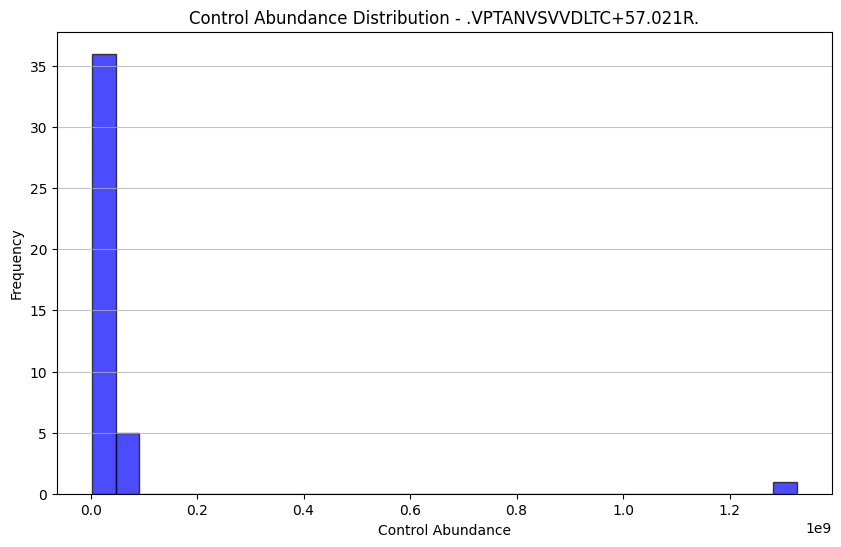

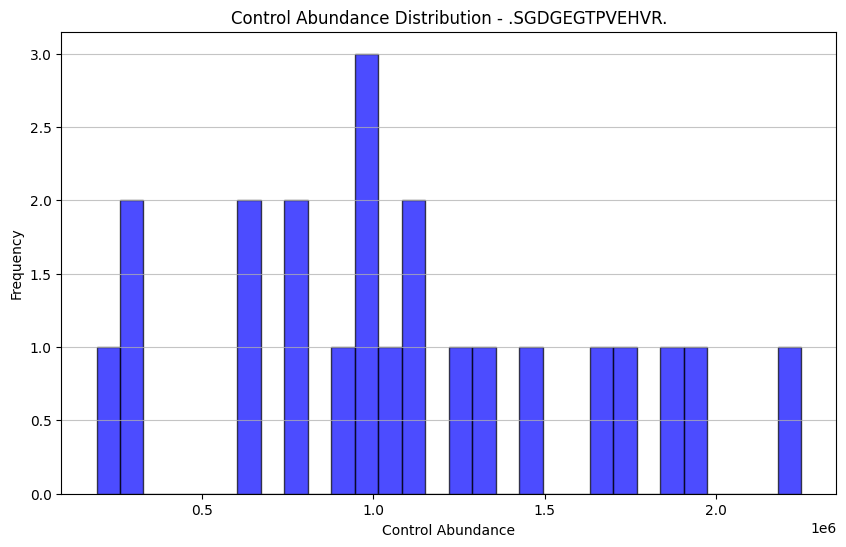

In [58]:
# Plot the control abundance dstribution for the least and most normally distributed peptide variants
import matplotlib.pyplot as plt
def plot_distribution(peptide_variant, title):
    control_values = peptide_variants_df.loc[peptide_variant, dmso_columns].dropna()
    plt.figure(figsize=(10, 6))
    plt.hist(control_values, bins=30, alpha=0.7, color='blue', edgecolor='black')
    plt.title(title)
    plt.xlabel('Control Abundance')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()
# Plot for the least normally distributed peptide variant
plot_distribution(least_normal_peptide.index[0], f'Control Abundance Distribution - {least_normal_peptide["Variant"].values[0]}')
# Plot for the most normally distributed peptide variant
plot_distribution(most_normal_peptide.index[0], f'Control Abundance Distribution - {most_normal_peptide["Variant"].values[0]}')

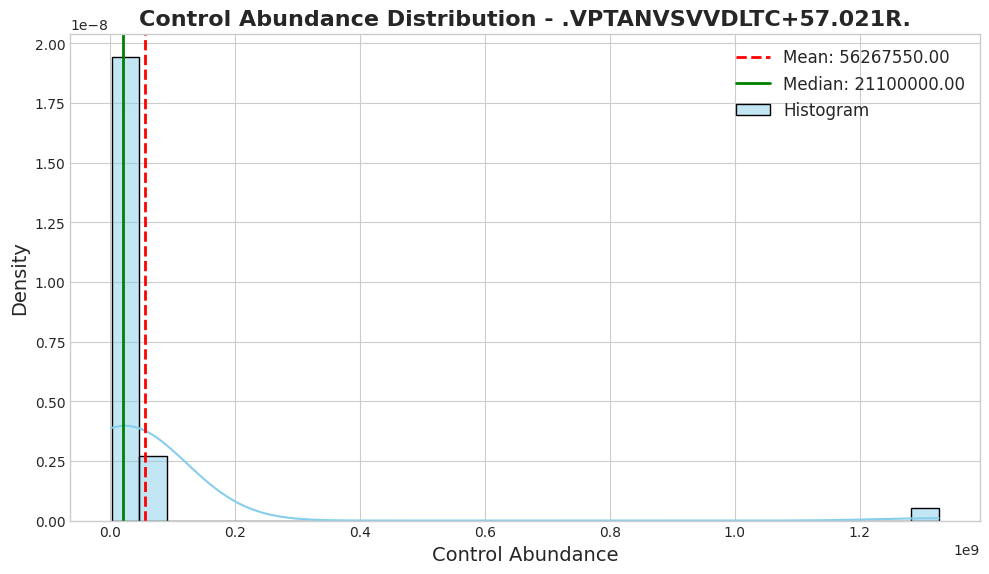

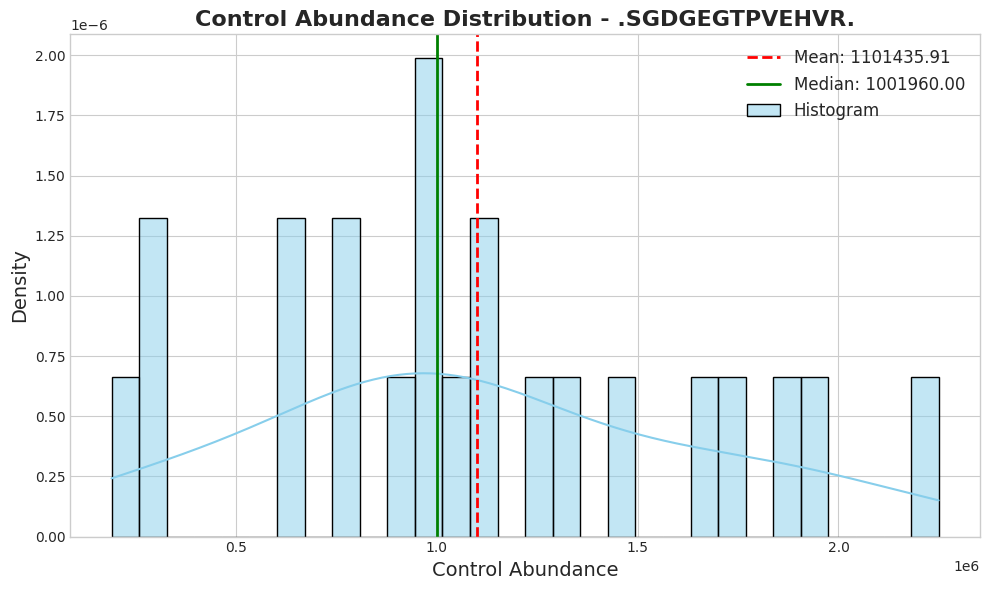

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_distribution(peptide_variant, title):
    control_values = peptide_variants_df.loc[peptide_variant, dmso_columns].dropna()
    mean_val = control_values.mean()
    median_val = control_values.median()

    plt.style.use('seaborn-v0_8-whitegrid')
    plt.figure(figsize=(10, 6))
    sns.histplot(control_values, bins=30, kde=True, color='skyblue', edgecolor='black', stat='density', label='Histogram')
    plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    plt.axvline(median_val, color='green', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel('Control Abundance', fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()

# Plot for the least normally distributed peptide variant
plot_distribution(least_normal_peptide.index[0], f'Control Abundance Distribution - {least_normal_peptide["Variant"].values[0]}')
# Plot for the most normally distributed peptide variant
plot_distribution(most_normal_peptide.index[0], f'Control Abundance Distribution - {most_normal_peptide["Variant"].values[0]}')

AttributeError: 'float' object has no attribute 'shape'

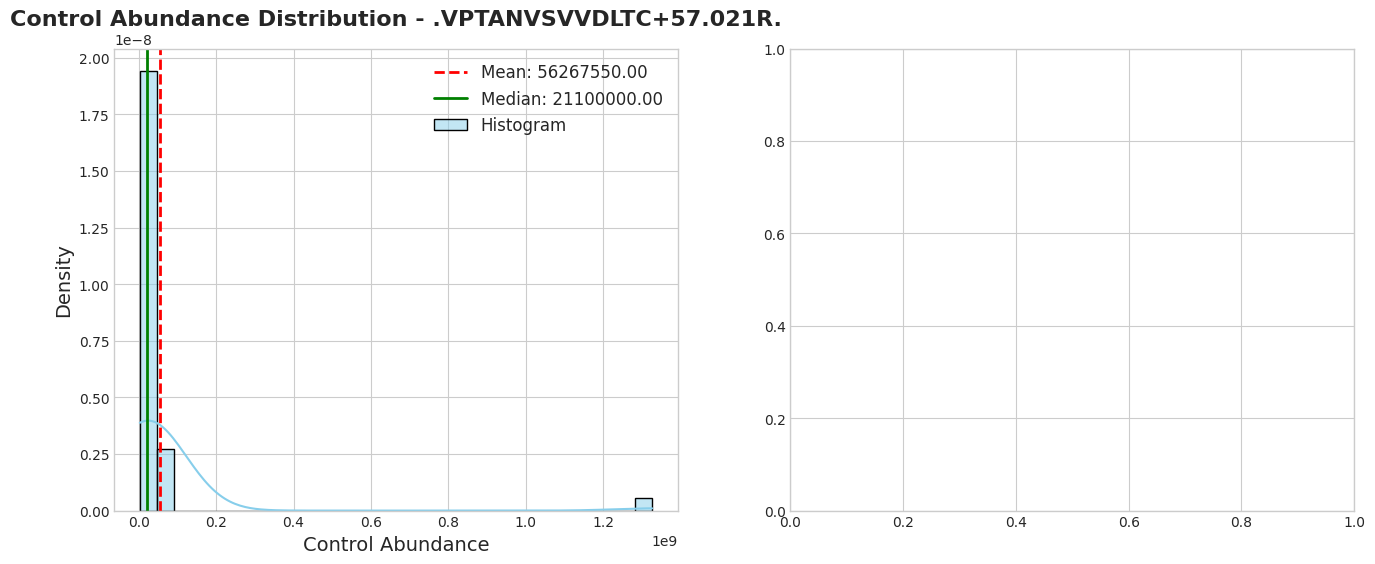

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def plot_distribution_and_qq(peptide_variant, title):
    control_values = peptide_variants_df.loc[peptide_variant, dmso_columns].dropna()
    mean_val = control_values.mean()
    median_val = control_values.median()

    plt.style.use('seaborn-v0_8-whitegrid')
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Histogram with KDE
    sns.histplot(control_values, bins=30, kde=True, color='skyblue', edgecolor='black', stat='density', label='Histogram', ax=axes[0])
    axes[0].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[0].axvline(median_val, color='green', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')
    axes[0].set_title(title, fontsize=16, fontweight='bold')
    axes[0].set_xlabel('Control Abundance', fontsize=14)
    axes[0].set_ylabel('Density', fontsize=14)
    axes[0].legend(fontsize=12)

    # Q-Q plot
    stats.probplot(control_values, dist="norm", plot=axes[1])
    axes[1].set_title(f'Q-Q Plot - {title}', fontsize=16, fontweight='bold')
    axes[1].set_xlabel('Theoretical Quantiles', fontsize=14)
    axes[1].set_ylabel('Sample Quantiles', fontsize=14)

    plt.tight_layout()
    plt.show()

# Plot for the least normally distributed peptide variant
plot_distribution_and_qq(least_normal_peptide.index[0], f'Control Abundance Distribution - {least_normal_peptide["Variant"].values[0]}')
# Plot for the most normally distributed peptide variant
plot_distribution_and_qq(most_normal_peptide.index[0], f'Control Abundance Distribution - {most_normal_peptide["Variant"].values[0]}')

In [36]:
# Compute ratios and log ratios for each drug treatment column
peptide_variants_ratios = peptide_variants_df.copy()
peptide_variants_log_ratios = peptide_variants_df.copy()

for col in filtered_drug_columns:
    peptide_variants_ratios[col] = np.where(
        peptide_variants_df['Control_Median_Abundance'] > 0,
        peptide_variants_df[col] / peptide_variants_df['Control_Median_Abundance'],
        np.nan
    )
    peptide_variants_log_ratios[col] = np.where(
        peptide_variants_df['Control_Median_Abundance'] > 0,
        np.log(peptide_variants_df[col] / peptide_variants_df['Control_Median_Abundance']),
        np.nan
    )

peptide_variants_df[['Variant', 'Control_Median_Abundance'] + filtered_drug_columns[:9]].head()

,Variant,Control_Median_Abundance,aew541_1000nm,aew541_100nm,aew541_10nm,aew541_30000nm,aew541_3000nm,aew541_300nm,aew541_30nm,aew541_3nm,aew541_dmso
0,.ESESTAGSFSLSVR.,5292500.0,15921000.0,35107000.0,23510000.0,7003800.0,11974000.0,28975000.0,23871000.0,25788000.0,24221000.0
1,.IQDKEGIPPDQQR.,4881150.0,4450700.0,7027600.0,4492100.0,3121300.0,3327800.0,3826700.0,1551300.0,4841800.0,4596300.0
2,.IFTSIGEDYDER.,12670000.0,8153300.0,13776000.0,9365300.0,6006600.0,8228400.0,13621000.0,5029400.0,10542000.0,9534400.0
3,.TAVC+57.021DIPPR.,2138200.0,4442300.0,7561200.0,6468900.0,3167000.0,3713800.0,6473200.0,3499900.0,8563200.0,6993100.0
4,.IITHPNFNGNTLDNDIMLIK.,52608000.0,134780000.0,300930000.0,167050000.0,107730000.0,155910000.0,219370000.0,80393000.0,144490000.0,130720000.0


In [37]:
peptide_variants_ratios[['Variant', 'Control_Median_Abundance'] + filtered_drug_columns[:9]].head()

,Variant,Control_Median_Abundance,aew541_1000nm,aew541_100nm,aew541_10nm,aew541_30000nm,aew541_3000nm,aew541_300nm,aew541_30nm,aew541_3nm,aew541_dmso
0,.ESESTAGSFSLSVR.,5292500.0,3.008219,6.633349,4.442135,1.323344,2.262447,5.474728,4.510345,4.872556,4.576476
1,.IQDKEGIPPDQQR.,4881150.0,0.911814,1.439743,0.920295,0.639460,0.681766,0.783975,0.317814,0.991938,0.941643
2,.IFTSIGEDYDER.,12670000.0,0.643512,1.087293,0.739171,0.474081,0.649440,1.075059,0.396953,0.832044,0.752518
3,.TAVC+57.021DIPPR.,2138200.0,2.077589,3.536245,3.025395,1.481152,1.736881,3.027406,1.636844,4.004864,3.270555
4,.IITHPNFNGNTLDNDIMLIK.,52608000.0,2.561968,5.720233,3.175373,2.047787,2.963618,4.169898,1.528152,2.746540,2.484793


In [38]:
peptide_variants_log_ratios[['Variant', 'Control_Median_Abundance'] + filtered_drug_columns[:9]].head()

,Variant,Control_Median_Abundance,aew541_1000nm,aew541_100nm,aew541_10nm,aew541_30000nm,aew541_3000nm,aew541_300nm,aew541_30nm,aew541_3nm,aew541_dmso
0,.ESESTAGSFSLSVR.,5292500.0,1.101348,1.892110,1.491135,0.280162,0.816447,1.700143,1.506374,1.583619,1.520929
1,.IQDKEGIPPDQQR.,4881150.0,-0.092319,0.364464,-0.083061,-0.447131,-0.383069,-0.243378,-1.146288,-0.008094,-0.060129
2,.IFTSIGEDYDER.,12670000.0,-0.440814,0.083691,-0.302226,-0.746378,-0.431645,0.072376,-0.923936,-0.183870,-0.284331
3,.TAVC+57.021DIPPR.,2138200.0,0.731208,1.263066,1.107042,0.392820,0.552091,1.107706,0.492770,1.387510,1.184960
4,.IITHPNFNGNTLDNDIMLIK.,52608000.0,0.940776,1.744009,1.155425,0.716760,1.086411,1.427892,0.424059,1.010342,0.910189


In [39]:
# Get median log ratios and standard deviations of log ratios for each peptide variant

peptide_variants_log_ratios['Control_Log_Ratio_Median'] = peptide_variants_log_ratios[dmso_columns].median(axis=1, skipna=True)
peptide_variants_log_ratios['Control_Log_Ratio_StdDev'] = peptide_variants_log_ratios[dmso_columns].std(axis=1, skipna=True)
peptide_variants_log_ratios[['Variant', 'Control_Log_Ratio_Median', 'Control_Log_Ratio_StdDev'] + filtered_drug_columns[:9]].head()

,Variant,Control_Log_Ratio_Median,Control_Log_Ratio_StdDev,aew541_1000nm,aew541_100nm,aew541_10nm,aew541_30000nm,aew541_3000nm,aew541_300nm,aew541_30nm,aew541_3nm,aew541_dmso
0,.ESESTAGSFSLSVR.,0.000000,0.856921,1.101348,1.892110,1.491135,0.280162,0.816447,1.700143,1.506374,1.583619,1.520929
1,.IQDKEGIPPDQQR.,-0.001706,0.905393,-0.092319,0.364464,-0.083061,-0.447131,-0.383069,-0.243378,-1.146288,-0.008094,-0.060129
2,.IFTSIGEDYDER.,0.000000,1.088943,-0.440814,0.083691,-0.302226,-0.746378,-0.431645,0.072376,-0.923936,-0.183870,-0.284331
3,.TAVC+57.021DIPPR.,-0.000006,1.200130,0.731208,1.263066,1.107042,0.392820,0.552091,1.107706,0.492770,1.387510,1.184960
4,.IITHPNFNGNTLDNDIMLIK.,-0.000048,1.679313,0.940776,1.744009,1.155425,0.716760,1.086411,1.427892,0.424059,1.010342,0.910189


In [40]:
# Get peptide log ratio vectors for clustering
peptide_log_ratio_vectors = peptide_variants_log_ratios[['Variant'] + filtered_drug_columns + ['Top canonical protein']].set_index('Variant')
peptide_log_ratio_vectors.head()

,aew541_1000nm,aew541_100nm,aew541_10nm,aew541_30000nm,aew541_3000nm,aew541_300nm,aew541_30nm,aew541_3nm,aew541_dmso,amg208_1000nm,...,baricitib_1000nm,baricitib_100nm,baricitib_10nm,baricitib_30000nm,baricitib_3000nm,baricitib_300nm,baricitib_30nm,baricitib_3nm,baricitib_dmso,Top canonical protein
Variant,,,,,,,,,,,,,,,,,,,,,
.ESESTAGSFSLSVR.,1.101348,1.892110,1.491135,0.280162,0.816447,1.700143,1.506374,1.583619,1.520929,-0.012568,...,0.742455,1.045818,1.238641,0.927470,0.992569,1.289661,0.751051,0.876963,0.885885,sp|P06239|LCK_HUMAN
.IQDKEGIPPDQQR.,-0.092319,0.364464,-0.083061,-0.447131,-0.383069,-0.243378,-1.146288,-0.008094,-0.060129,-0.200187,...,-1.031266,0.681391,1.240571,-0.667092,-0.455981,-0.032281,0.485386,0.545799,0.869324,sp|P62979|RS27A_HUMAN
.IFTSIGEDYDER.,-0.440814,0.083691,-0.302226,-0.746378,-0.431645,0.072376,-0.923936,-0.183870,-0.284331,-3.317920,...,0.922240,2.280157,2.333208,1.301569,1.082995,1.464654,2.033410,1.828437,1.778704,sp|P35232|PHB_HUMAN
.TAVC+57.021DIPPR.,0.731208,1.263066,1.107042,0.392820,0.552091,1.107706,0.492770,1.387510,1.184960,NaN,...,-0.667112,0.245509,1.087435,-0.772118,-0.668753,0.311790,0.821198,1.290100,0.179261,sp|P07437|TBB5_HUMAN
.IITHPNFNGNTLDNDIMLIK.,0.940776,1.744009,1.155425,0.716760,1.086411,1.427892,0.424059,1.010342,0.910189,-0.787067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRYP_PIG


In [41]:
# Save to csv
peptide_log_ratio_vectors.to_csv('peptide_log_ratio_vectors.csv')

In [42]:
# Get peptide_z-scores over log ratio values

peptide_variants_z_scores = peptide_variants_log_ratios.copy()
for col in filtered_drug_columns:
    peptide_variants_z_scores[col] = np.where(
        peptide_variants_z_scores['Control_Log_Ratio_StdDev'] > 0,
        (peptide_variants_z_scores[col] - peptide_variants_z_scores['Control_Log_Ratio_Median']) / peptide_variants_z_scores['Control_Log_Ratio_StdDev'],
        np.nan
    )

peptide_variants_z_scores[['Variant', 'Control_Log_Ratio_Median', 'Control_Log_Ratio_StdDev'] + filtered_drug_columns[:9]].head()

,Variant,Control_Log_Ratio_Median,Control_Log_Ratio_StdDev,aew541_1000nm,aew541_100nm,aew541_10nm,aew541_30000nm,aew541_3000nm,aew541_300nm,aew541_30nm,aew541_3nm,aew541_dmso
0,.ESESTAGSFSLSVR.,0.000000,0.856921,1.285239,2.208032,1.740108,0.326940,0.952768,1.984013,1.757890,1.848033,1.774876
1,.IQDKEGIPPDQQR.,-0.001706,0.905393,-0.100082,0.404432,-0.089856,-0.491970,-0.421214,-0.266925,-1.264183,-0.007056,-0.064528
2,.IFTSIGEDYDER.,0.000000,1.088943,-0.404809,0.076855,-0.277540,-0.685415,-0.396389,0.066464,-0.848471,-0.168852,-0.261107
3,.TAVC+57.021DIPPR.,-0.000006,1.200130,0.609279,1.052446,0.922440,0.327320,0.460031,0.922994,0.410602,1.156138,0.987365
4,.IITHPNFNGNTLDNDIMLIK.,-0.000048,1.679313,0.560243,1.038554,0.688063,0.426846,0.646966,0.850312,0.252548,0.601669,0.542030


In [43]:
# Get peptide z-score vectors for clustering
peptide_z_score_vectors = peptide_variants_z_scores[['Variant'] + filtered_drug_columns + ['Top canonical protein']].set_index('Variant')
peptide_z_score_vectors.head()

,aew541_1000nm,aew541_100nm,aew541_10nm,aew541_30000nm,aew541_3000nm,aew541_300nm,aew541_30nm,aew541_3nm,aew541_dmso,amg208_1000nm,...,baricitib_1000nm,baricitib_100nm,baricitib_10nm,baricitib_30000nm,baricitib_3000nm,baricitib_300nm,baricitib_30nm,baricitib_3nm,baricitib_dmso,Top canonical protein
Variant,,,,,,,,,,,,,,,,,,,,,
.ESESTAGSFSLSVR.,1.285239,2.208032,1.740108,0.326940,0.952768,1.984013,1.757890,1.848033,1.774876,-0.014666,...,0.866421,1.220436,1.445455,1.082329,1.158297,1.504993,0.876452,1.023389,1.033800,sp|P06239|LCK_HUMAN
.IQDKEGIPPDQQR.,-0.100082,0.404432,-0.089856,-0.491970,-0.421214,-0.266925,-1.264183,-0.007056,-0.064528,-0.219221,...,-1.137142,0.754475,1.372086,-0.734915,-0.501744,-0.033770,0.537989,0.604715,0.962047,sp|P62979|RS27A_HUMAN
.IFTSIGEDYDER.,-0.404809,0.076855,-0.277540,-0.685415,-0.396389,0.066464,-0.848471,-0.168852,-0.261107,-3.046919,...,0.846913,2.093918,2.142637,1.195260,0.994538,1.345024,1.867325,1.679094,1.633423,sp|P35232|PHB_HUMAN
.TAVC+57.021DIPPR.,0.609279,1.052446,0.922440,0.327320,0.460031,0.922994,0.410602,1.156138,0.987365,NaN,...,-0.555861,0.204574,0.906103,-0.643357,-0.557229,0.259802,0.684262,1.074972,0.149373,sp|P07437|TBB5_HUMAN
.IITHPNFNGNTLDNDIMLIK.,0.560243,1.038554,0.688063,0.426846,0.646966,0.850312,0.252548,0.601669,0.542030,-0.468655,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRYP_PIG


In [44]:
# Save to csv
peptide_z_score_vectors.to_csv('peptide_z_score_vectors.csv')

In [45]:
# Get p-values from z-scores using 2-tailed test
import scipy.stats

peptide_variants_p_values = peptide_variants_z_scores.copy()
for col in filtered_drug_columns:
    peptide_variants_p_values[col] = np.where(
        peptide_variants_z_scores[col].notna(),
        scipy.stats.norm.sf(abs(peptide_variants_z_scores[col]))*2,
        np.nan
    )

peptide_variants_p_values[['Variant', 'Control_Log_Ratio_Median', 'Control_Log_Ratio_StdDev'] + filtered_drug_columns[:9]].head()

,Variant,Control_Log_Ratio_Median,Control_Log_Ratio_StdDev,aew541_1000nm,aew541_100nm,aew541_10nm,aew541_30000nm,aew541_3000nm,aew541_300nm,aew541_30nm,aew541_3nm,aew541_dmso
0,.ESESTAGSFSLSVR.,0.000000,0.856921,0.198709,0.027242,0.081840,0.743713,0.340708,0.047254,0.078766,0.064598,0.075918
1,.IQDKEGIPPDQQR.,-0.001706,0.905393,0.920279,0.685895,0.928402,0.622741,0.673599,0.789527,0.206164,0.994370,0.948549
2,.IFTSIGEDYDER.,0.000000,1.088943,0.685618,0.938739,0.781365,0.493082,0.691818,0.947008,0.396176,0.865913,0.794010
3,.TAVC+57.021DIPPR.,-0.000006,1.200130,0.542339,0.292595,0.356299,0.743426,0.645494,0.356010,0.681364,0.247625,0.323464
4,.IITHPNFNGNTLDNDIMLIK.,-0.000048,1.679313,0.575314,0.299012,0.491413,0.669491,0.517654,0.395152,0.800618,0.547395,0.587798


In [46]:
# To see rows with any null values:
rows_with_nulls = peptide_variants_p_values[peptide_variants_p_values.isnull().any(axis=1)]
print(len(rows_with_nulls))

4168


In [47]:
# Get significantly perturbed peptides for each drug treatment
# Filter for p-values <= 0.05

significantly_perturbed_peptides = {}
for col in filtered_drug_columns:
    significantly_perturbed_peptides[col] = []
    for index, row in peptide_variants_p_values.iterrows():
        if row[col] <= 0.05:
            entry = {
                'Variant': row['Variant'],
                'z_score': peptide_variants_z_scores.loc[index, col],
                'p_value': row[col],
                'log_ratio': peptide_variants_log_ratios.loc[index, col]
            }
            significantly_perturbed_peptides[col].append(entry)
    print(f"Number of significantly perturbed peptides for {col}: {len(significantly_perturbed_peptides[col])}")

Number of significantly perturbed peptides for aew541_1000nm: 29
Number of significantly perturbed peptides for aew541_100nm: 162
Number of significantly perturbed peptides for aew541_10nm: 39
Number of significantly perturbed peptides for aew541_30000nm: 48
Number of significantly perturbed peptides for aew541_3000nm: 30
Number of significantly perturbed peptides for aew541_300nm: 175
Number of significantly perturbed peptides for aew541_30nm: 66
Number of significantly perturbed peptides for aew541_3nm: 154
Number of significantly perturbed peptides for aew541_dmso: 110
Number of significantly perturbed peptides for amg208_1000nm: 37
Number of significantly perturbed peptides for amg208_100nm: 33
Number of significantly perturbed peptides for amg208_10nm: 19
Number of significantly perturbed peptides for amg208_30000nm: 37
Number of significantly perturbed peptides for amg208_3000nm: 74
Number of significantly perturbed peptides for amg208_300nm: 39
Number of significantly perturbed 

KeyboardInterrupt: 

In [ ]:
print(significantly_perturbed_peptides['aew541_1000nm'])

[{'Variant': '.FTDDYQLFEELGKGAFSVVR.', 'z_score': np.float64(-2.071412264744531), 'p_value': 0.038320285708396566, 'log_ratio': np.float64(-2.489210305765021)}, {'Variant': '.DLKPSNILYVDESGNPEC+57.021LR.', 'z_score': np.float64(-2.3243848808137715), 'p_value': 0.020104875161458393, 'log_ratio': np.float64(-2.169456425015465)}, {'Variant': '.YLATLNFVHR.', 'z_score': np.float64(2.0362019210682907), 'p_value': 0.04173008344587532, 'log_ratio': np.float64(2.0317899368971073)}, {'Variant': '.ESTNYPGDYTLC+57.021VSC+57.021DGKVEHYR.', 'z_score': np.float64(2.203495811401803), 'p_value': 0.027559821870007134, 'log_ratio': np.float64(2.8359365838602573)}, {'Variant': '.LFQQILSGVDYC+57.021HR.', 'z_score': np.float64(1.9649198153131924), 'p_value': 0.049423518899439634, 'log_ratio': np.float64(1.815651856294981)}, {'Variant': '.QETVDC+57.021LKK.', 'z_score': np.float64(-3.9025635386761106), 'p_value': 9.517924173849378e-05, 'log_ratio': np.float64(-4.111339881059187)}, {'Variant': '.EVVEEAENGR.', 

In [ ]:
print(len(significantly_perturbed_peptides['aew541_1000nm']))

29


In [ ]:
# Get dataframe of significantly perturbed peptides for desired treatment

perturbed_df = pd.DataFrame(significantly_perturbed_peptides['aew541_1000nm'])
perturbed_df.head(29)

,Variant,z_score,p_value,log_ratio
0,.FTDDYQLFEELGKGAFSVVR.,-2.071412,3.832029e-02,-2.489210
1,.DLKPSNILYVDESGNPEC+57.021LR.,-2.324385,2.010488e-02,-2.169456
2,.YLATLNFVHR.,2.036202,4.173008e-02,2.031790
3,.ESTNYPGDYTLC+57.021VSC+57.021DGKVEHYR.,2.203496,2.755982e-02,2.835937
4,.LFQQILSGVDYC+57.021HR.,1.964920,4.942352e-02,1.815652
5,.QETVDC+57.021LKK.,-3.902564,9.517924e-05,-4.111340
6,.EVVEEAENGR.,-2.217947,2.655842e-02,-2.331555
7,.VLENAEGAR.,-3.203830,1.356128e-03,-2.837755
8,.GSQITQQSTNQSR.,-2.950428,3.173339e-03,-3.953880
9,.VSYDVTSAR.,-2.338774,1.934713e-02,-2.074077


# Unmodified Peptide Analysis

In [ ]:
# Get total number of unmodified peptides
unmodified_peptides = peptide_variants_df['Unmod variant'].unique()
print(f"Number of unique unmodified peptides: {len(unmodified_peptides)}")
print(f"Unmodified peptides: {unmodified_peptides}")

# Unique Protein Analysis

In [ ]:
# Get total number of peptide rows that uniquely match to a single protein
unique_protein_peptide_rows = peptide_variants_df[peptide_variants_df['Proteins'].str.contains(';') == False].copy()
print(f"Number of peptide rows that uniquely match to a single protein: {len(unique_protein_peptide_rows)}")

# Get the unique proteins from that dataframe
unique_proteins = unique_protein_peptide_rows['Proteins'].unique()
print(f"Number of unique proteins: {len(unique_proteins)}")
print(f"Unique proteins: {unique_proteins}")

unique_protein_peptide_rows.head()

Number of peptide rows that uniquely match to a single protein: 645
Number of unique proteins: 227
Unique proteins: ['TRYP_PIG' 'sp|P41240|CSK_HUMAN' 'sp|P14174|MIF_HUMAN'
 'sp|P19338|NUCL_HUMAN' 'sp|Q8TD19|NEK9_HUMAN' 'sp|Q00535|CDK5_HUMAN'
 'sp|P21796|VDAC1_HUMAN' 'sp|Q9H773|DCTP1_HUMAN' 'sp|P10809|CH60_HUMAN'
 'sp|P06576|ATPB_HUMAN' 'sp|Q9Y478|AAKB1_HUMAN' 'sp|P28482|MK01_HUMAN'
 'sp|Q16832|DDR2_HUMAN' 'sp|P38646|GRP75_HUMAN' 'sp|P11021|BIP_HUMAN'
 'sp|P04264|K2C1_HUMAN' 'sp|O96013|PAK4_HUMAN' 'sp|P06241|FYN_HUMAN'
 'sp|P41743|KPCI_HUMAN' 'sp|O43353|RIPK2_HUMAN' 'sp|P13639|EF2_HUMAN'
 'sp|Q9Y4K4|M4K5_HUMAN' 'sp|Q9H479|FN3K_HUMAN' 'sp|P17252|KPCA_HUMAN'
 'sp|P08238|HS90B_HUMAN' 'sp|P61981|1433G_HUMAN' 'sp|O14965|AURKA_HUMAN'
 'sp|P68371|TBB4B_HUMAN' 'sp|P62269|RS18_HUMAN' 'sp|Q9Y2U5|M3K2_HUMAN'
 'sp|P62857|RS28_HUMAN' 'sp|P05387|RLA2_HUMAN' 'sp|P62906|RL10A_HUMAN'
 'sp|Q16539-2|MK14_HUMAN' 'sp|P30050|RL12_HUMAN' 'sp|Q01650|LAT1_HUMAN'
 'sp|P04843|RPN1_HUMAN' 'sp|Q9Y5S2|MRCKB_HUMAN' '

,rowid,ccms_row_id,Variant,Variant ID,Unmod variant,Total,Total- Unmodified sequence,Variants- Unmodified sequence,Proteins,Mass,...,baricitib_30000nm,baricitib_3000nm,baricitib_300nm,baricitib_30nm,baricitib_3nm,baricitib_dmso,baricitib_pdpd,Control_Mean_Abundance,Control_Median_Abundance,Control_StdDev_Abundance
4,15,15,.IITHPNFNGNTLDNDIMLIK.,37659,.IITHPNFNGNTLDNDIMLIK.,4830,20735,81,TRYP_PIG,2283.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.313119e+08,52608000.0,1.985865e+08
15,44,44,.VATVSLPR.,93900,.VATVSLPR.,3321,4190,31,TRYP_PIG,842.5,...,72081000.0,74186000.0,80264000.0,109580000.0,102580000.0,108150000.0,NaN,1.989536e+08,127130000.0,1.690895e+08
28,70,70,.HSNLVQLLGVIVEEK.,34569,.HSNLVQLLGVIVEEK.,2868,3656,28,sp|P41240|CSK_HUMAN,1677.9,...,17026000.0,16907000.0,17734000.0,37630000.0,27651000.0,23940000.0,13555000.0,7.908085e+07,24598000.0,1.685034e+08
48,116,116,.PMFIVNTNVPR.,69186,.PMFIVNTNVPR.,2361,10053,12,sp|P14174|MIF_HUMAN,1287.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.990786e+07,29243500.0,5.023216e+07
49,117,117,.KFGYVDFESAEDLEK.,43172,.KFGYVDFESAEDLEK.,2353,2644,10,sp|P19338|NUCL_HUMAN,1776.8,...,2148800.0,NaN,1679900.0,6958900.0,5593000.0,4346100.0,2534600.0,7.465717e+06,4322900.0,1.200381e+07


In [ ]:
# Get ratios, log, ratios, z-scores, and p-values for unique protein rows

unique_protein_peptide_ratios = peptide_variants_ratios[peptide_variants_df['Proteins'].str.contains(';') == False].copy()
unique_protein_peptide_log_ratios = peptide_variants_log_ratios[peptide_variants_df['Proteins'].str.contains(';') == False].copy()
unique_protein_peptide_z_scores = peptide_variants_z_scores[peptide_variants_df['Proteins'].str.contains(';') == False].copy()
unique_protein_peptide_p_values = peptide_variants_p_values[peptide_variants_df['Proteins'].str.contains(';') == False].copy()

unique_protein_peptide_ratios[['Variant', 'Control_Median_Abundance'] + filtered_drug_columns[:9]].head()

,Variant,Control_Median_Abundance,aew541_1000nm,aew541_100nm,aew541_10nm,aew541_30000nm,aew541_3000nm,aew541_300nm,aew541_30nm,aew541_3nm,aew541_dmso
4,.IITHPNFNGNTLDNDIMLIK.,52608000.0,2.561968,5.720233,3.175373,2.047787,2.963618,4.169898,1.528152,2.746540,2.484793
15,.VATVSLPR.,127130000.0,NaN,NaN,NaN,NaN,NaN,0.011723,NaN,NaN,NaN
28,.HSNLVQLLGVIVEEK.,24598000.0,0.493373,1.413733,0.717741,0.415522,0.387279,1.698512,3.347671,1.048093,1.139524
48,.PMFIVNTNVPR.,29243500.0,1.389437,2.509891,1.572691,0.931865,2.297776,2.783354,1.127396,1.661532,1.834972
49,.KFGYVDFESAEDLEK.,4322900.0,0.738925,0.730736,0.584908,NaN,0.861297,NaN,NaN,0.763561,NaN


In [ ]:
unique_protein_peptide_log_ratios[['Variant', 'Control_Log_Ratio_Median', 'Control_Log_Ratio_StdDev'] + filtered_drug_columns[:9]].head()

,Variant,Control_Log_Ratio_Median,Control_Log_Ratio_StdDev,aew541_1000nm,aew541_100nm,aew541_10nm,aew541_30000nm,aew541_3000nm,aew541_300nm,aew541_30nm,aew541_3nm,aew541_dmso
4,.IITHPNFNGNTLDNDIMLIK.,-0.000048,1.679313,0.940776,1.744009,1.155425,0.716760,1.086411,1.427892,0.424059,1.010342,0.910189
15,.VATVSLPR.,-0.000394,0.936525,NaN,NaN,NaN,NaN,NaN,-4.446166,NaN,NaN,NaN
28,.HSNLVQLLGVIVEEK.,-0.000358,1.347874,-0.706489,0.346234,-0.331646,-0.878221,-0.948609,0.529753,1.208265,0.046973,0.130610
48,.PMFIVNTNVPR.,-0.000043,1.052155,0.328899,0.920239,0.452788,-0.070567,0.831942,1.023657,0.119910,0.507740,0.607029
49,.KFGYVDFESAEDLEK.,0.000000,0.951480,-0.302559,-0.313703,-0.536300,NaN,-0.149316,NaN,NaN,-0.269762,NaN


In [ ]:
unique_protein_peptide_z_scores[['Variant', 'Control_Log_Ratio_Median', 'Control_Log_Ratio_StdDev'] + filtered_drug_columns[:9]].head()

,Variant,Control_Log_Ratio_Median,Control_Log_Ratio_StdDev,aew541_1000nm,aew541_100nm,aew541_10nm,aew541_30000nm,aew541_3000nm,aew541_300nm,aew541_30nm,aew541_3nm,aew541_dmso
4,.IITHPNFNGNTLDNDIMLIK.,-0.000048,1.679313,0.560243,1.038554,0.688063,0.426846,0.646966,0.850312,0.252548,0.601669,0.542030
15,.VATVSLPR.,-0.000394,0.936525,NaN,NaN,NaN,NaN,NaN,-4.747093,NaN,NaN,NaN
28,.HSNLVQLLGVIVEEK.,-0.000358,1.347874,-0.523885,0.257139,-0.245786,-0.651294,-0.703516,0.393294,0.896688,0.035115,0.097166
48,.PMFIVNTNVPR.,-0.000043,1.052155,0.312636,0.874665,0.430385,-0.067028,0.790744,0.972956,0.114007,0.482612,0.576980
49,.KFGYVDFESAEDLEK.,0.000000,0.951480,-0.317987,-0.329700,-0.563648,NaN,-0.156930,NaN,NaN,-0.283518,NaN


In [ ]:
unique_protein_peptide_p_values[['Variant', 'Control_Log_Ratio_Median', 'Control_Log_Ratio_StdDev'] + filtered_drug_columns[:9]].head()

,Variant,Control_Log_Ratio_Median,Control_Log_Ratio_StdDev,aew541_1000nm,aew541_100nm,aew541_10nm,aew541_30000nm,aew541_3000nm,aew541_300nm,aew541_30nm,aew541_3nm,aew541_dmso
4,.IITHPNFNGNTLDNDIMLIK.,-0.000048,1.679313,0.575314,0.299012,0.491413,0.669491,0.517654,0.395152,0.800618,0.547395,0.587798
15,.VATVSLPR.,-0.000394,0.936525,NaN,NaN,NaN,NaN,NaN,0.000002,NaN,NaN,NaN
28,.HSNLVQLLGVIVEEK.,-0.000358,1.347874,0.600359,0.797071,0.805848,0.514857,0.481734,0.694103,0.369885,0.971988,0.922594
48,.PMFIVNTNVPR.,-0.000043,1.052155,0.754557,0.381756,0.666916,0.946559,0.429094,0.330575,0.909232,0.629371,0.563953
49,.KFGYVDFESAEDLEK.,0.000000,0.951480,0.750495,0.741627,0.572993,NaN,0.875300,NaN,NaN,0.776780,NaN


In [ ]:
# Make a dictionary of unique protein peptide statistics and their corresponding perturbations
from scipy.stats import mannwhitneyu
import warnings

warnings.filterwarnings('ignore')
unique_protein_perturbations = {}

for protein in unique_proteins:
    unique_protein_perturbations[protein] = {}
    unique_protein_perturbations[protein]['Variant Abundances'] = unique_protein_peptide_rows[unique_protein_peptide_rows['Proteins'] == protein].copy()
    unique_protein_perturbations[protein]['Ratios'] = unique_protein_peptide_ratios[unique_protein_peptide_ratios['Proteins'] == protein].copy()
    unique_protein_perturbations[protein]['Log Ratios'] = unique_protein_peptide_log_ratios[unique_protein_peptide_log_ratios['Proteins'] == protein].copy()
    unique_protein_perturbations[protein]['Z-Scores'] = unique_protein_peptide_z_scores[unique_protein_peptide_z_scores['Proteins'] == protein].copy()
    unique_protein_perturbations[protein]['P-Values'] = unique_protein_peptide_p_values[unique_protein_peptide_p_values['Proteins'] == protein].copy()
    unique_protein_perturbations[protein]['Num Variants'] = len(unique_protein_perturbations[protein]['Variant Abundances'])
    unique_protein_perturbations[protein]['Variants List'] = unique_protein_perturbations[protein]['Variant Abundances']['Variant'].tolist()
    unique_protein_perturbations[protein]['Median Peptide Ratios'] = unique_protein_perturbations[protein]['Ratios'][filtered_drug_columns].median(axis=0, skipna=True)
    unique_protein_perturbations[protein]['Median Peptide Log Ratios'] = unique_protein_perturbations[protein]['Log Ratios'][filtered_drug_columns].median(axis=0, skipna=True)
    unique_protein_perturbations[protein]['Median Peptide Z-Scores'] = unique_protein_perturbations[protein]['Z-Scores'][filtered_drug_columns].median(axis=0, skipna=True)
    unique_protein_perturbations[protein]['Standard Deviation of Peptide Log Ratios'] = unique_protein_perturbations[protein]['Log Ratios'][filtered_drug_columns].std(axis=0, skipna=True)
    unique_protein_perturbations[protein]['Standard Deviation of Peptide Z-Scores'] = unique_protein_perturbations[protein]['Z-Scores'][filtered_drug_columns].std(axis=0, skipna=True)

    # Get Wilcoxon Rank-Sum U Statistics, Effect Sizes, and P-Values for each drug treatment
    unique_protein_perturbations[protein]['Wilcoxon U Statistics'] = {}
    unique_protein_perturbations[protein]['Wilcoxon P-Values'] = {}
    unique_protein_perturbations[protein]['Wilcoxon Effect Size (Rank-Biserial Correlation)'] = {}
    for col in filtered_drug_columns:
        dmso_col = col.split('_')[0] + '_dmso'
        if col == dmso_col:
            continue
        x = unique_protein_perturbations[protein]['Z-Scores'][col]
        y = unique_protein_perturbations[protein]['Z-Scores'][dmso_col]
        n1 = x.notna().sum() # Get size of x
        n2 = y.notna().sum() # Get size of y
        u_stat, p_value = mannwhitneyu(x, y, nan_policy='omit', alternative='two-sided')

        # Calculate the rank-biserial correlation (r) as the effect size
        if n1 > 3 and n2 > 3 and u_stat is not None and not np.isnan(u_stat):
            r = ((2 * u_stat) / (n1 * n2)) - 1
        else:
            r = None

        unique_protein_perturbations[protein]['Wilcoxon U Statistics'][col] = float(u_stat) if u_stat is not None and not np.isnan(u_stat) else None
        unique_protein_perturbations[protein]['Wilcoxon P-Values'][col] = float(p_value) if p_value is not None and not np.isnan(p_value) else None
        unique_protein_perturbations[protein]['Wilcoxon Effect Size (Rank-Biserial Correlation)'][col] = float(r) if r is not None and not np.isnan(r) else None

print(unique_protein_perturbations['sp|P41240|CSK_HUMAN']['Wilcoxon U Statistics'])
print(unique_protein_perturbations['sp|P41240|CSK_HUMAN']['Wilcoxon P-Values'])
print(unique_protein_perturbations['sp|P41240|CSK_HUMAN']['Wilcoxon Effect Size (Rank-Biserial Correlation)'])


{'aew541_1000nm': 38.0, 'aew541_100nm': 97.0, 'aew541_10nm': 56.0, 'aew541_30000nm': 28.0, 'aew541_3000nm': 31.0, 'aew541_300nm': 74.0, 'aew541_30nm': 44.0, 'aew541_3nm': 91.0, 'amg208_1000nm': 26.0, 'amg208_100nm': 28.0, 'amg208_10nm': 34.0, 'amg208_30000nm': 35.0, 'amg208_3000nm': 20.0, 'amg208_300nm': 27.0, 'amg208_30nm': 23.0, 'amg208_3nm': 67.0, 'amg900_1000nm': 0.0, 'amg900_100nm': 35.0, 'amg900_10nm': 33.0, 'amg900_30000nm': 47.0, 'amg900_3000nm': 41.0, 'amg900_300nm': 47.0, 'amg900_30nm': 35.0, 'amg900_3nm': 18.0, 'arry380_1000nm': 51.0, 'arry380_100nm': 52.0, 'arry380_10nm': 50.0, 'arry380_30000nm': 129.0, 'arry380_3000nm': 31.0, 'arry380_300nm': 25.0, 'arry380_30nm': 137.0, 'arry380_3nm': 136.0, 'asp3026_1000nm': 17.0, 'asp3026_100nm': 60.0, 'asp3026_10nm': 59.0, 'asp3026_30000nm': 27.0, 'asp3026_3000nm': 64.0, 'asp3026_300nm': 55.0, 'asp3026_30nm': 85.0, 'asp3026_3nm': 78.0, 'at13148_1000nm': 36.0, 'at13148_100nm': 30.0, 'at13148_10nm': 40.0, 'at13148_30000nm': 40.0, 'at1314

In [ ]:
# Get Effect Size Dataframe for unique proteins
unique_protein_effect_size = pd.DataFrame.from_dict(
    {protein: unique_protein_perturbations[protein]['Wilcoxon Effect Size (Rank-Biserial Correlation)'] for protein in unique_proteins},
    orient='index'
)
unique_protein_effect_size.index.name = 'Protein'
unique_protein_effect_size.head()

,aew541_1000nm,aew541_100nm,aew541_10nm,aew541_30000nm,aew541_3000nm,aew541_300nm,aew541_30nm,aew541_3nm,amg208_1000nm,amg208_100nm,...,barasertibhqpa_30nm,barasertibhqpa_3nm,baricitib_1000nm,baricitib_100nm,baricitib_10nm,baricitib_30000nm,baricitib_3000nm,baricitib_300nm,baricitib_30nm,baricitib_3nm
Protein,,,,,,,,,,,,,,,,,,,,,
TRYP_PIG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sp|P41240|CSK_HUMAN,-0.512821,0.077778,-0.333333,-0.666667,-0.602564,-0.051282,-0.388889,0.083333,-0.566667,-0.533333,...,-0.209524,0.161905,-1.000000,0.500000,0.360000,-0.760000,-0.840000,-0.520000,0.120000,0.040000
sp|P14174|MIF_HUMAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sp|P19338|NUCL_HUMAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.533333,-0.533333,...,-0.600000,-0.250000,-1.000000,0.611111,0.500000,-0.722222,-1.000000,-1.000000,0.133333,-0.133333
sp|Q8TD19|NEK9_HUMAN,-0.578231,0.047619,-0.405896,-0.659864,-0.641723,-0.021645,-0.655329,-0.080952,-0.321053,-0.352381,...,-0.225108,-0.076605,-0.960938,0.601562,0.691667,-1.000000,-0.973214,-0.328125,0.225000,0.141667


In [ ]:
# Save the Effect Size DataFrame to a CSV file
unique_protein_effect_size.to_csv('unique_protein_effect_size_threshold_4.csv')

In [ ]:
# Get Median Peptide Log Ratio Dataframe for unique proteins
unique_protein_median_log_ratios = pd.DataFrame.from_dict(
    {protein: unique_protein_perturbations[protein]['Median Peptide Log Ratios'] for protein in unique_proteins},
    orient='index'
)
unique_protein_median_log_ratios.index.name = 'Protein'
unique_protein_median_log_ratios.head()


,aew541_1000nm,aew541_100nm,aew541_10nm,aew541_30000nm,aew541_3000nm,aew541_300nm,aew541_30nm,aew541_3nm,aew541_dmso,amg208_1000nm,...,barasertibhqpa_dmso,baricitib_1000nm,baricitib_100nm,baricitib_10nm,baricitib_30000nm,baricitib_3000nm,baricitib_300nm,baricitib_30nm,baricitib_3nm,baricitib_dmso
Protein,,,,,,,,,,,,,,,,,,,,,
TRYP_PIG,0.940776,1.744009,1.155425,0.716760,1.086411,-1.509137,0.424059,1.010342,0.910189,-0.451649,...,1.470299,-0.726238,0.020553,0.120567,-0.567420,-0.538635,-0.459889,-0.148555,-0.214567,-0.161691
sp|P41240|CSK_HUMAN,0.382405,1.084954,0.541756,-0.053218,0.156334,0.981271,0.448584,1.114172,0.860258,-0.253192,...,0.232814,-0.414378,0.839415,0.749104,-0.198376,-0.256437,0.100262,0.624833,0.475701,0.553685
sp|P14174|MIF_HUMAN,0.799609,1.530923,0.910437,0.575781,1.372006,1.457061,0.819331,0.975540,1.242896,0.116257,...,0.699106,0.144499,0.895838,1.574015,-0.169044,-0.217590,0.812697,1.182808,1.160294,0.681467
sp|P19338|NUCL_HUMAN,0.534412,0.567361,0.405127,-0.166914,0.193581,0.555095,-0.042928,0.620879,0.008399,-0.374645,...,-0.247926,-0.961213,0.470820,0.360918,-0.238536,-0.653014,-0.697444,0.286979,0.221304,0.133151
sp|Q8TD19|NEK9_HUMAN,0.538416,1.065353,0.781868,0.284929,0.358601,1.079757,0.105880,0.863516,1.022991,0.170037,...,0.557003,0.260674,1.307719,1.378807,-0.370655,0.092756,0.789860,1.113890,1.052636,0.969824


In [ ]:
# Save the Median Peptide Log Ratio DataFrame to a CSV file
unique_protein_median_log_ratios.to_csv('unique_protein_median_log_ratios.csv')

In [ ]:
# Get the Median Peptide Z-Score Dataframe for unique proteins
unique_protein_median_z_scores = pd.DataFrame.from_dict(
    {protein: unique_protein_perturbations[protein]['Median Peptide Z-Scores'] for protein in unique_proteins},
    orient='index'
)
unique_protein_median_z_scores.index.name = 'Protein'
unique_protein_median_z_scores.head()


,aew541_1000nm,aew541_100nm,aew541_10nm,aew541_30000nm,aew541_3000nm,aew541_300nm,aew541_30nm,aew541_3nm,aew541_dmso,amg208_1000nm,...,barasertibhqpa_dmso,baricitib_1000nm,baricitib_100nm,baricitib_10nm,baricitib_30000nm,baricitib_3000nm,baricitib_300nm,baricitib_30nm,baricitib_3nm,baricitib_dmso
Protein,,,,,,,,,,,,,,,,,,,,,
TRYP_PIG,0.560243,1.038554,0.688063,0.426846,0.646966,-1.948390,0.252548,0.601669,0.542030,-0.296171,...,0.974091,-0.775039,0.022368,0.129160,-0.605457,-0.574721,-0.490638,-0.158203,-0.228689,-0.172229
sp|P41240|CSK_HUMAN,0.346800,0.996905,0.397487,-0.050327,0.122353,0.846767,0.317880,0.892736,0.879285,-0.180044,...,0.270659,-0.464325,1.035870,0.943892,-0.235133,-0.233878,0.125279,0.758361,0.578379,0.672496
sp|P14174|MIF_HUMAN,0.763042,1.460197,0.868611,0.550194,1.308606,1.389393,0.782383,0.930668,1.185816,0.110515,...,0.664553,0.138030,0.855732,1.503548,-0.161476,-0.207849,0.776313,1.129855,1.108349,0.650958
sp|P19338|NUCL_HUMAN,0.591425,0.669731,0.427192,-0.176215,0.203769,0.650904,-0.049231,0.655657,0.008906,-0.393761,...,-0.260968,-1.047591,0.499786,0.404316,-0.223813,-0.648289,-0.716810,0.302081,0.270725,0.143420
sp|Q8TD19|NEK9_HUMAN,0.601880,1.226309,0.752684,0.299519,0.425008,1.157115,0.110769,1.070158,1.182189,0.157148,...,0.715350,0.206300,1.312935,1.396207,-0.376565,0.078362,0.843831,1.065478,1.078843,1.025840


In [ ]:
# Save the Median Peptide Z-Score DataFrame to a CSV file
unique_protein_median_z_scores.to_csv('unique_protein_median_z_scores.csv')


In [ ]:
# Get significantly perturbed unique proteins for each drug treatment
# If majority of peptides for a protein are significantly perturbed, and their z-scores have the same sign, then the protein is considered significantly perturbed

significantly_perturbed_unique_proteins = {}
for col in filtered_drug_columns:
    dmso_col = col.split('_')[0] + '_dmso'
    if col == dmso_col:
        continue
    significantly_perturbed_unique_proteins[col] = []

    for protein in unique_proteins:
        protein_data = unique_protein_perturbations[protein]
        z_scores = protein_data['Z-Scores'][['Variant', col]]
        p_values = protein_data['P-Values'][['Variant', col]]
        positive_peptide_perturbation_count = 0
        negative_peptide_perturbation_count = 0

        # Get total peptide perturbation count for the protein
        # Add 1 for positively perturbed peptides and subtract 1 for negatively perturbed peptides
        for index, (z_row, p_row) in enumerate(zip(z_scores.itertuples(index=False), p_values.itertuples(index=False))):
            assert z_row.Variant == p_row.Variant, f"Variant mismatch at row {index}: {z_row.Variant} != {p_row.Variant}"
            if getattr(p_row, col) <= 0.05 and getattr(z_row, col) > 0:
                positive_peptide_perturbation_count += 1
            elif getattr(p_row, col) <= 0.05 and getattr(z_row, col) < 0:
                negative_peptide_perturbation_count += 1

        # Check if the protein is significantly perturbed
        # If more than half of the peptides are significantly perturbed in the same direction, consider the protein significantly perturbed
        # 1 for positive perturbation, -1 for negative perturbation
        protein_perturbation = 0
        if positive_peptide_perturbation_count > 0 and positive_peptide_perturbation_count > len(z_scores)/2:
            protein_perturbation = 1
        elif negative_peptide_perturbation_count > 0 and negative_peptide_perturbation_count > len(z_scores)/2:
            protein_perturbation = -1

        # If the protein is significantly perturbed, add it to the list
        if protein_perturbation != 0:
            entry = {
                'Protein': protein,
                'Overall Perturbation': protein_perturbation, # 1 for positive, -1 for negative
                'Number of Peptides': protein_data['Num Variants'],
                'Peptide List': protein_data['Variants List'],
                'Wilcoxon U Statistic': protein_data['Wilcoxon U Statistics'][col],
                'Wilcoxon Effect Size (Rank-Biserial Correlation)': protein_data['Wilcoxon Effect Size (Rank-Biserial Correlation)'][col],
                'Wilcoxon P-Value': protein_data['Wilcoxon P-Values'][col],
                'Median Peptide Abundance Ratio': protein_data['Median Peptide Ratios'][col],
                'Median Peptide Log Ratio': protein_data['Median Peptide Log Ratios'][col],
                'Median Peptide Z-Score': protein_data['Median Peptide Z-Scores'][col]
            }
            significantly_perturbed_unique_proteins[col].append(entry)

    # Print the number of significantly perturbed proteins for the current drug treatment
    print(f"Number of significantly perturbed proteins for {col}: {len(significantly_perturbed_unique_proteins[col])}")


Number of significantly perturbed proteins for aew541_1000nm: 2
Number of significantly perturbed proteins for aew541_100nm: 6
Number of significantly perturbed proteins for aew541_10nm: 1
Number of significantly perturbed proteins for aew541_30000nm: 5
Number of significantly perturbed proteins for aew541_3000nm: 1
Number of significantly perturbed proteins for aew541_300nm: 4
Number of significantly perturbed proteins for aew541_30nm: 0
Number of significantly perturbed proteins for aew541_3nm: 7
Number of significantly perturbed proteins for amg208_1000nm: 1
Number of significantly perturbed proteins for amg208_100nm: 0
Number of significantly perturbed proteins for amg208_10nm: 0
Number of significantly perturbed proteins for amg208_30000nm: 0
Number of significantly perturbed proteins for amg208_3000nm: 3
Number of significantly perturbed proteins for amg208_300nm: 0
Number of significantly perturbed proteins for amg208_30nm: 0
Number of significantly perturbed proteins for amg208

In [ ]:
print(significantly_perturbed_unique_proteins['aew541_1000nm'])

[{'Protein': 'sp|P12270|TPR_HUMAN', 'Overall Perturbation': -1, 'Number of Peptides': 1, 'Peptide List': ['.ASTALSNEQQAR.'], 'Wilcoxon U Statistic': 0.0, 'Wilcoxon Effect Size (Rank-Biserial Correlation)': None, 'Wilcoxon P-Value': 1.0, 'Median Peptide Abundance Ratio': np.float64(0.26455379895593656), 'Median Peptide Log Ratio': np.float64(-1.3297106496673008), 'Median Peptide Z-Score': np.float64(-2.2513720381971654)}, {'Protein': 'sp|Q92522|H1X_HUMAN', 'Overall Perturbation': -1, 'Number of Peptides': 1, 'Peptide List': ['.GAPAAATAPAPTAHK.'], 'Wilcoxon U Statistic': 0.0, 'Wilcoxon Effect Size (Rank-Biserial Correlation)': None, 'Wilcoxon P-Value': 1.0, 'Median Peptide Abundance Ratio': np.float64(0.18301219032638616), 'Median Peptide Log Ratio': np.float64(-1.6982025145539283), 'Median Peptide Z-Score': np.float64(-2.0744879336702327)}]


In [ ]:
print(len(significantly_perturbed_unique_proteins['aew541_1000nm']))

2


In [ ]:
# Get dataframe of significantly perturbed proteins for desired treatment
perturbed_proteins_df = pd.DataFrame(significantly_perturbed_unique_proteins['aew541_1000nm'])
perturbed_proteins_df.head(2)

,Protein,Overall Perturbation,Number of Peptides,Peptide List,Wilcoxon U Statistic,Wilcoxon Effect Size (Rank-Biserial Correlation),Wilcoxon P-Value,Median Peptide Abundance Ratio,Median Peptide Log Ratio,Median Peptide Z-Score
0,sp|P12270|TPR_HUMAN,-1,1,[.ASTALSNEQQAR.],0.0,None,1.0,0.264554,-1.329711,-2.251372
1,sp|Q92522|H1X_HUMAN,-1,1,[.GAPAAATAPAPTAHK.],0.0,None,1.0,0.183012,-1.698203,-2.074488


In [ ]:
# Get subset of perturbed proteins with significant Wilcoxon P-Values
low_p_significantly_perturbed_unique_proteins = {}
for col in filtered_drug_columns:
    dmso_col = col.split('_')[0] + '_dmso'
    if col == dmso_col:
        continue
    low_p_significantly_perturbed_unique_proteins[col] = []
    for entry in significantly_perturbed_unique_proteins[col]:
        if entry['Wilcoxon P-Value'] is not None and entry['Wilcoxon P-Value'] <= 0.05:
            low_p_significantly_perturbed_unique_proteins[col].append(entry)
    print(f"Number of significantly perturbed proteins with p-value <= 0.05 for {col}: {len(low_p_significantly_perturbed_unique_proteins[col])}")

# Get the drug column with the highest number of significantly perturbed proteins
max_perturbed_col = max(low_p_significantly_perturbed_unique_proteins, key=lambda k: len(low_p_significantly_perturbed_unique_proteins[k]))
print(f"Column with the highest number of significantly perturbed proteins: {max_perturbed_col}")
print(f"Number of significantly perturbed proteins in {max_perturbed_col}: {len(low_p_significantly_perturbed_unique_proteins[max_perturbed_col])}")

# Get the dataframe of significantly perturbed proteins for the column with the highest number of significantly perturbed proteins
perturbed_proteins_df_max = pd.DataFrame(low_p_significantly_perturbed_unique_proteins[max_perturbed_col])
perturbed_proteins_df_max.head(len(perturbed_proteins_df_max))


Number of significantly perturbed proteins with p-value <= 0.05 for aew541_1000nm: 0
Number of significantly perturbed proteins with p-value <= 0.05 for aew541_100nm: 0
Number of significantly perturbed proteins with p-value <= 0.05 for aew541_10nm: 0
Number of significantly perturbed proteins with p-value <= 0.05 for aew541_30000nm: 0
Number of significantly perturbed proteins with p-value <= 0.05 for aew541_3000nm: 0
Number of significantly perturbed proteins with p-value <= 0.05 for aew541_300nm: 0
Number of significantly perturbed proteins with p-value <= 0.05 for aew541_30nm: 0
Number of significantly perturbed proteins with p-value <= 0.05 for aew541_3nm: 0
Number of significantly perturbed proteins with p-value <= 0.05 for amg208_1000nm: 0
Number of significantly perturbed proteins with p-value <= 0.05 for amg208_100nm: 0
Number of significantly perturbed proteins with p-value <= 0.05 for amg208_10nm: 0
Number of significantly perturbed proteins with p-value <= 0.05 for amg208_3

,Protein,Overall Perturbation,Number of Peptides,Peptide List,Wilcoxon U Statistic,Wilcoxon Effect Size (Rank-Biserial Correlation),Wilcoxon P-Value,Median Peptide Abundance Ratio,Median Peptide Log Ratio,Median Peptide Z-Score
0,sp|P41240|CSK_HUMAN,1,15,"[.HSNLVQLLGVIVEEK., .NVLVSEDNVAK., .VMEGTVAAQD...",118.0,0.638889,0.008616,15.351438,2.731177,2.400215
1,sp|Q8TD19|NEK9_HUMAN,1,25,"[.LGLDSEEDYYTPQKVDVPK., .LGLDSEEDYYTPQK., .VSC...",352.0,0.676190,0.000224,8.340555,2.121130,2.156179
2,sp|Q16832|DDR2_HUMAN,1,8,"[.YLSSLNFVHR., .QVLDGNSNPYDIFLKDLEPPIVAR., .NR...",48.0,0.959184,0.001166,8.555390,2.146561,2.985574
3,sp|P38646|GRP75_HUMAN,1,7,"[.STNGDTFLGGEDFDQALLR., .VQQTVQDLFGR., .ETAENY...",32.0,0.828571,0.017677,5.175803,1.643994,2.186887
4,sp|P41743|KPCI_HUMAN,1,4,"[.ASSSLGLQDFDLLR., .FYSAEISLALNYLHER., .DLKLDN...",16.0,1.000000,0.028571,7.631584,2.000957,2.707297
5,sp|Q9Y4K4|M4K5_HUMAN,1,7,"[.TFQLYSHNLIALFEHAK., .DFPKPAINGLPPTPK., .LLTH...",23.0,0.840000,0.031746,7.633436,2.032538,2.373607
6,sp|P62906|RL10A_HUMAN,1,5,"[.KYDAFLASESLIK., .FSVC+57.021VLGDQQHC+57.021D...",23.0,0.840000,0.031746,8.019252,2.081845,2.619898
7,sp|Q9Y5S2|MRCKB_HUMAN,1,10,"[.GAGATLEHQQEISK., .HAFFEGLNWENIR., .KLALQEFSE...",70.0,0.944444,0.000329,10.555400,2.355619,2.504732
8,sp|Q08211|DHX9_HUMAN,1,13,"[.LAQFEPSQR., .GISHVIVDEIHER., .TPLHEIALSIK., ...",132.0,1.000000,0.000055,6.249947,1.832573,2.370840
9,sp|P42685|FRK_HUMAN,1,8,"[.TAEDLSFR., .SLQAEPWFFGAIGR., .ESESQKGEFSLSVL...",49.0,0.750000,0.013986,9.108172,2.208768,2.904289


In [ ]:
# Get significantly perturbed unique proteins for each drug treatment
# This time only consider proteins with a significant Wilcoxon U statistic

wilcoxon_significantly_perturbed_unique_proteins = {}
for col in filtered_drug_columns:
    dmso_col = col.split('_')[0] + '_dmso'
    if col == dmso_col:
        continue
    wilcoxon_significantly_perturbed_unique_proteins[col] = []

    for protein in unique_proteins:
        protein_data = unique_protein_perturbations[protein]
        wilcoxon_p_value = protein_data['Wilcoxon P-Values'][col]
        wilcoxon_effect_size = protein_data['Wilcoxon Effect Size (Rank-Biserial Correlation)'][col]

        # Check if the Wilcoxon U statistic is significant
        protein_perturbation = 0
        if wilcoxon_p_value is not None and wilcoxon_effect_size is not None:
            if wilcoxon_p_value <= 0.05 and wilcoxon_effect_size > 0:
                protein_perturbation = 1
            elif wilcoxon_p_value <= 0.05 and wilcoxon_effect_size < 0:
                protein_perturbation = -1

        # If the protein is significantly perturbed, add it to the list
        if protein_perturbation != 0:
            entry = {
                'Protein': protein,
                'Overall Perturbation': protein_perturbation, # 1 for positive, -1 for negative
                'Number of Peptides': protein_data['Num Variants'],
                'Peptide List': protein_data['Variants List'],
                'Wilcoxon U Statistic': protein_data['Wilcoxon U Statistics'][col],
                'Wilcoxon Effect Size (Rank-Biserial Correlation)': protein_data['Wilcoxon Effect Size (Rank-Biserial Correlation)'][col],
                'Wilcoxon P-Value': protein_data['Wilcoxon P-Values'][col],
                'Median Peptide Abundance Ratio': protein_data['Median Peptide Ratios'][col],
                'Median Peptide Log Ratio': protein_data['Median Peptide Log Ratios'][col],
                'Median Peptide Z-Score': protein_data['Median Peptide Z-Scores'][col]
            }
            wilcoxon_significantly_perturbed_unique_proteins[col].append(entry)

    # Print the number of significantly perturbed proteins for the current drug treatment
    print(f"Number of significantly perturbed proteins for {col}: {len(wilcoxon_significantly_perturbed_unique_proteins[col])}")


Number of significantly perturbed proteins for aew541_1000nm: 7
Number of significantly perturbed proteins for aew541_100nm: 3
Number of significantly perturbed proteins for aew541_10nm: 1
Number of significantly perturbed proteins for aew541_30000nm: 9
Number of significantly perturbed proteins for aew541_3000nm: 11
Number of significantly perturbed proteins for aew541_300nm: 1
Number of significantly perturbed proteins for aew541_30nm: 10
Number of significantly perturbed proteins for aew541_3nm: 0
Number of significantly perturbed proteins for amg208_1000nm: 7
Number of significantly perturbed proteins for amg208_100nm: 6
Number of significantly perturbed proteins for amg208_10nm: 0
Number of significantly perturbed proteins for amg208_30000nm: 7
Number of significantly perturbed proteins for amg208_3000nm: 22
Number of significantly perturbed proteins for amg208_300nm: 5
Number of significantly perturbed proteins for amg208_30nm: 14
Number of significantly perturbed proteins for am

In [ ]:
print(wilcoxon_significantly_perturbed_unique_proteins['aew541_1000nm'])

[{'Protein': 'sp|P41240|CSK_HUMAN', 'Overall Perturbation': -1, 'Number of Peptides': 15, 'Peptide List': ['.HSNLVQLLGVIVEEK.', '.NVLVSEDNVAK.', '.VMEGTVAAQDEFYR.', '.VSDFGLTK.', '.EQLEHIKTHELHL.', '.FSLDVC+57.021EAMEYLEGNNFVHR.', '.NVLVSEDNVAKVSDFGLTK.', '.SVLGGDC+57.021LLK.', '.PLKDVVPR.', '.NDATAQAFLAEASVMTQLR.', '.GGLYIVTEYMAK.', '.GEFGDVMLGDYR.', '.EASSTQDTGKLPVKWTAPEALR.', '.WTAPEALREK.', '.SGWALNMK.'], 'Wilcoxon U Statistic': 38.0, 'Wilcoxon Effect Size (Rank-Biserial Correlation)': -0.5128205128205128, 'Wilcoxon P-Value': 0.031672726558414944, 'Median Peptide Abundance Ratio': np.float64(1.4658062107494767), 'Median Peptide Log Ratio': np.float64(0.38240540560629643), 'Median Peptide Z-Score': np.float64(0.3467998437178707)}, {'Protein': 'sp|Q8TD19|NEK9_HUMAN', 'Overall Perturbation': -1, 'Number of Peptides': 25, 'Peptide List': ['.LGLDSEEDYYTPQKVDVPK.', '.LGLDSEEDYYTPQK.', '.VSC+57.021GDEFTIAATDDNHIFAWGNGGNGR.', '.QVC+57.021AGNTHFAVVTVEK.', '.PIFGSLHHVPDLSC+57.021R.', '.VTLLN

In [ ]:
print(len(wilcoxon_significantly_perturbed_unique_proteins['aew541_1000nm']))

7


In [ ]:
# Get dataframe of significantly perturbed proteins for desired treatment
perturbed_proteins_df = pd.DataFrame(wilcoxon_significantly_perturbed_unique_proteins['aew541_1000nm'])
perturbed_proteins_df.head(len(perturbed_proteins_df))

,Protein,Overall Perturbation,Number of Peptides,Peptide List,Wilcoxon U Statistic,Wilcoxon Effect Size (Rank-Biserial Correlation),Wilcoxon P-Value,Median Peptide Abundance Ratio,Median Peptide Log Ratio,Median Peptide Z-Score
0,sp|P41240|CSK_HUMAN,-1,15,"[.HSNLVQLLGVIVEEK., .NVLVSEDNVAK., .VMEGTVAAQD...",38.0,-0.512821,0.031673,1.465806,0.382405,0.346800
1,sp|Q8TD19|NEK9_HUMAN,-1,25,"[.LGLDSEEDYYTPQKVDVPK., .LGLDSEEDYYTPQK., .VSC...",93.0,-0.578231,0.001399,1.713291,0.538416,0.601880
2,sp|P11021|BIP_HUMAN,-1,20,"[.DNHLLGTFDLTGIPPAPR., .VTHAVVTVPAYFNDAQR., .I...",43.0,-0.590476,0.007273,0.884151,-0.123128,-0.118379
3,sp|Q9Y4K4|M4K5_HUMAN,-1,7,"[.TFQLYSHNLIALFEHAK., .DFPKPAINGLPPTPK., .LLTH...",0.0,-1.000000,0.009524,1.450698,0.369462,0.424876
4,sp|Q08211|DHX9_HUMAN,-1,13,"[.LAQFEPSQR., .GISHVIVDEIHER., .TPLHEIALSIK., ...",5.0,-0.900000,0.000769,1.316171,0.273808,0.329677
5,sp|Q92616|GCN1_HUMAN,-1,17,"[.VDENGPELLPR., .LSVADSQAEAK., .QAGAEALSQAVAR....",15.0,-0.625000,0.026647,1.342864,0.291122,0.370694
6,sp|Q14204|DYHC1_HUMAN,-1,6,"[.VTDFGDKVEDPTFLNQLQSGVNR., .AHQANQLYPFAISLIES...",2.0,-0.840000,0.031746,1.061260,0.059457,0.060746


# Top Canonical Protein Analysis

In [ ]:
# Compute the same as above for Top Canonical Proteins
canonical_protein_peptide_rows = peptide_variants_df.copy()
canonical_protein_peptide_ratios = peptide_variants_ratios.copy()
canonical_protein_peptide_log_ratios = peptide_variants_log_ratios.copy()
canonical_protein_peptide_z_scores = peptide_variants_z_scores.copy()
canonical_protein_peptide_p_values = peptide_variants_p_values.copy()

# Get the canonical proteins from the filtered data
canonical_proteins = peptide_variants_df['Top canonical protein'].unique()
print(f"Number of top canonical proteins: {len(canonical_proteins)}")
print(f"Top canonical proteins: {canonical_proteins[0]}")

Number of top canonical proteins: 828
Top canonical proteins: sp|P06239|LCK_HUMAN


In [ ]:
# Make a dictionary of top canonical protein peptide statistics and their corresponding perturbations
warnings.filterwarnings('ignore')
canonical_protein_perturbations = {}

for protein in canonical_proteins:
    canonical_protein_perturbations[protein] = {}
    canonical_protein_perturbations[protein]['Variant Abundances'] = canonical_protein_peptide_rows[canonical_protein_peptide_rows['Top canonical protein'] == protein].copy()
    canonical_protein_perturbations[protein]['Ratios'] = canonical_protein_peptide_ratios[canonical_protein_peptide_ratios['Top canonical protein'] == protein].copy()
    canonical_protein_perturbations[protein]['Log Ratios'] = canonical_protein_peptide_log_ratios[canonical_protein_peptide_log_ratios['Top canonical protein'] == protein].copy()
    canonical_protein_perturbations[protein]['Z-Scores'] = canonical_protein_peptide_z_scores[canonical_protein_peptide_z_scores['Top canonical protein'] == protein].copy()
    canonical_protein_perturbations[protein]['P-Values'] = canonical_protein_peptide_p_values[canonical_protein_peptide_p_values['Top canonical protein'] == protein].copy()
    canonical_protein_perturbations[protein]['Num Variants'] = len(canonical_protein_perturbations[protein]['Variant Abundances'])
    canonical_protein_perturbations[protein]['Variants List'] = canonical_protein_perturbations[protein]['Variant Abundances']['Variant'].tolist()
    canonical_protein_perturbations[protein]['Median Peptide Ratios'] = canonical_protein_perturbations[protein]['Ratios'][filtered_drug_columns].median(axis=0, skipna=True)
    canonical_protein_perturbations[protein]['Median Peptide Log Ratios'] = canonical_protein_perturbations[protein]['Log Ratios'][filtered_drug_columns].median(axis=0, skipna=True)
    canonical_protein_perturbations[protein]['Median Peptide Z-Scores'] = canonical_protein_perturbations[protein]['Z-Scores'][filtered_drug_columns].median(axis=0, skipna=True)
    canonical_protein_perturbations[protein]['Standard Deviation of Peptide Log Ratios'] = canonical_protein_perturbations[protein]['Log Ratios'][filtered_drug_columns].std(axis=0, skipna=True)
    canonical_protein_perturbations[protein]['Standard Deviation of Peptide Z-Scores'] = canonical_protein_perturbations[protein]['Z-Scores'][filtered_drug_columns].std(axis=0, skipna=True)

    # Get Wilcoxon Rank-Sum U Statistics, Effect Sizes, and P-Values for each drug treatment
    canonical_protein_perturbations[protein]['Wilcoxon U Statistics'] = {}
    canonical_protein_perturbations[protein]['Wilcoxon P-Values'] = {}
    canonical_protein_perturbations[protein]['Wilcoxon Effect Size (Rank-Biserial Correlation)'] = {}
    for col in filtered_drug_columns:
        dmso_col = col.split('_')[0] + '_dmso'
        if col == dmso_col:
            continue
        x = canonical_protein_perturbations[protein]['Z-Scores'][col]
        y = canonical_protein_perturbations[protein]['Z-Scores'][dmso_col]
        n1 = x.notna().sum() # Get size of x
        n2 = y.notna().sum() # Get size of y
        u_stat, p_value = mannwhitneyu(x, y, nan_policy='omit', alternative='two-sided')

        # Calculate the rank-biserial correlation (r) as the effect size
        if n1 > 3 and n2 > 3 and u_stat is not None and not np.isnan(u_stat):
            r = ((2 * u_stat) / (n1 * n2)) - 1
        else:
            r = None

        canonical_protein_perturbations[protein]['Wilcoxon U Statistics'][col] = float(u_stat) if u_stat is not None and not np.isnan(u_stat) else None
        canonical_protein_perturbations[protein]['Wilcoxon P-Values'][col] = float(p_value) if p_value is not None and not np.isnan(p_value) else None
        canonical_protein_perturbations[protein]['Wilcoxon Effect Size (Rank-Biserial Correlation)'][col] = float(r) if r is not None and not np.isnan(r) else None

print(canonical_protein_perturbations['sp|P06239|LCK_HUMAN']['Wilcoxon U Statistics'])
print(canonical_protein_perturbations['sp|P06239|LCK_HUMAN']['Wilcoxon P-Values'])
print(canonical_protein_perturbations['sp|P06239|LCK_HUMAN']['Wilcoxon Effect Size (Rank-Biserial Correlation)'])


{'aew541_1000nm': 38.0, 'aew541_100nm': 137.0, 'aew541_10nm': 65.0, 'aew541_30000nm': 13.0, 'aew541_3000nm': 18.0, 'aew541_300nm': 103.0, 'aew541_30nm': 34.0, 'aew541_3nm': 126.0, 'amg208_1000nm': 29.0, 'amg208_100nm': 38.0, 'amg208_10nm': 58.0, 'amg208_30000nm': 35.0, 'amg208_3000nm': 21.0, 'amg208_300nm': 45.0, 'amg208_30nm': 25.0, 'amg208_3nm': 145.0, 'amg900_1000nm': None, 'amg900_100nm': 61.0, 'amg900_10nm': 76.0, 'amg900_30000nm': 111.0, 'amg900_3000nm': 73.0, 'amg900_300nm': 133.0, 'amg900_30nm': 65.0, 'amg900_3nm': 73.0, 'arry380_1000nm': 65.0, 'arry380_100nm': 62.0, 'arry380_10nm': 87.0, 'arry380_30000nm': 106.0, 'arry380_3000nm': 61.0, 'arry380_300nm': 81.0, 'arry380_30nm': 152.0, 'arry380_3nm': 138.0, 'asp3026_1000nm': 19.0, 'asp3026_100nm': 134.0, 'asp3026_10nm': 77.0, 'asp3026_30000nm': 21.0, 'asp3026_3000nm': 53.0, 'asp3026_300nm': 44.0, 'asp3026_30nm': 124.0, 'asp3026_3nm': 138.0, 'at13148_1000nm': 94.0, 'at13148_100nm': 39.0, 'at13148_10nm': 78.0, 'at13148_30000nm': 94.

In [ ]:
# Get Effect Size Dataframe for top canonical proteins
canonical_protein_effect_size = pd.DataFrame.from_dict(
    {protein: canonical_protein_perturbations[protein]['Wilcoxon Effect Size (Rank-Biserial Correlation)'] for protein in canonical_proteins},
    orient='index'
)
canonical_protein_effect_size.index.name = 'Protein'
canonical_protein_effect_size.head()


,aew541_1000nm,aew541_100nm,aew541_10nm,aew541_30000nm,aew541_3000nm,aew541_300nm,aew541_30nm,aew541_3nm,amg208_1000nm,amg208_100nm,...,barasertibhqpa_30nm,barasertibhqpa_3nm,baricitib_1000nm,baricitib_100nm,baricitib_10nm,baricitib_30000nm,baricitib_3000nm,baricitib_300nm,baricitib_30nm,baricitib_3nm
Protein,,,,,,,,,,,,,,,,,,,,,
sp|P06239|LCK_HUMAN,-0.662222,0.141667,-0.422222,-0.876190,-0.840000,-0.084444,-0.697778,0.120000,-0.704082,-0.582418,...,-0.283333,0.066667,-0.504132,0.353535,0.472727,-0.454545,-0.468531,-0.409091,0.123967,0.074380
sp|P62979|RS27A_HUMAN,-0.285714,0.500000,0.061224,-0.571429,-0.285714,0.035714,-0.523810,0.071429,-0.476190,-0.380952,...,-0.432099,-0.388889,-0.916667,0.500000,1.000000,-0.666667,-0.666667,-0.500000,0.000000,-0.333333
sp|P35232|PHB_HUMAN,-0.296703,0.266272,0.043956,-0.472527,-0.417582,0.164835,-0.401709,0.269231,-0.318681,-0.450549,...,-0.191667,-0.078125,-0.233333,0.322222,0.487179,-0.148718,-0.166667,-0.138462,0.266667,-0.200000
sp|P07437|TBB5_HUMAN,-0.291866,0.354978,-0.116883,-0.406699,-0.432900,0.200000,-0.340909,0.116883,-0.368421,-0.245000,...,-0.410431,-0.124717,-0.974026,0.045455,0.218182,-0.818182,-0.854545,-0.545455,-0.036364,-0.190083
TRYP_PIG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Save the Effect Size DataFrame to a CSV file
canonical_protein_effect_size.to_csv('canonical_protein_effect_size_threshold_4.csv')

In [ ]:
# Get Median Peptide Log Ratio Dataframe for top canonical proteins
canonical_protein_median_log_ratios = pd.DataFrame.from_dict(
    {protein: canonical_protein_perturbations[protein]['Median Peptide Log Ratios'] for protein in canonical_proteins},
    orient='index'
)
canonical_protein_median_log_ratios.index.name = 'Protein'
canonical_protein_median_log_ratios.head()

,aew541_1000nm,aew541_100nm,aew541_10nm,aew541_30000nm,aew541_3000nm,aew541_300nm,aew541_30nm,aew541_3nm,aew541_dmso,amg208_1000nm,...,barasertibhqpa_dmso,baricitib_1000nm,baricitib_100nm,baricitib_10nm,baricitib_30000nm,baricitib_3000nm,baricitib_300nm,baricitib_30nm,baricitib_3nm,baricitib_dmso
Protein,,,,,,,,,,,,,,,,,,,,,
sp|P06239|LCK_HUMAN,0.558103,1.259807,1.025159,0.037421,0.305001,1.116965,0.477004,1.161571,1.223240,-0.014987,...,0.581149,0.354672,1.218417,1.371741,0.308481,0.259183,0.611106,1.184013,1.045558,0.906571
sp|P62979|RS27A_HUMAN,-0.094285,0.489880,0.031677,-0.461907,-0.312883,0.159010,-0.314886,-0.011179,-0.060129,-0.123625,...,0.139932,-0.308267,1.035685,1.464641,0.175968,0.023287,0.553776,0.867362,0.683196,0.890937
sp|P35232|PHB_HUMAN,0.023168,0.560901,0.471960,-0.224923,-0.074566,0.549410,-0.497592,0.566447,0.175773,0.368894,...,-0.197708,0.729304,1.593866,1.612474,0.862698,0.795275,0.943058,1.448972,1.047385,1.297387
sp|P07437|TBB5_HUMAN,0.354458,1.064081,0.593888,0.201854,0.040585,0.934218,0.135276,0.850903,0.670144,-0.112253,...,0.606154,-0.298242,0.982633,1.215377,0.054054,0.059454,0.499121,0.988061,0.908028,1.068389
TRYP_PIG,0.940776,1.744009,1.155425,0.716760,1.086411,-1.509137,0.424059,1.010342,0.910189,-0.451649,...,1.470299,-0.726238,0.020553,0.120567,-0.567420,-0.538635,-0.459889,-0.148555,-0.214567,-0.161691


In [ ]:
# Save the Median Peptide Log Ratio DataFrame to a CSV file
canonical_protein_median_log_ratios.to_csv('canonical_protein_median_log_ratios.csv')

In [ ]:
# Get Median Peptide Z-Score Dataframe for top canonical proteins
canonical_protein_median_z_scores = pd.DataFrame.from_dict(
    {protein: canonical_protein_perturbations[protein]['Median Peptide Z-Scores'] for protein in canonical_proteins},
    orient='index'
)
canonical_protein_median_z_scores.index.name = 'Protein'
canonical_protein_median_z_scores.head()

,aew541_1000nm,aew541_100nm,aew541_10nm,aew541_30000nm,aew541_3000nm,aew541_300nm,aew541_30nm,aew541_3nm,aew541_dmso,amg208_1000nm,...,barasertibhqpa_dmso,baricitib_1000nm,baricitib_100nm,baricitib_10nm,baricitib_30000nm,baricitib_3000nm,baricitib_300nm,baricitib_30nm,baricitib_3nm,baricitib_dmso
Protein,,,,,,,,,,,,,,,,,,,,,
sp|P06239|LCK_HUMAN,0.593410,1.348121,0.949605,0.043963,0.307757,1.247522,0.540063,1.302223,1.298180,-0.018223,...,0.671027,0.398471,1.406821,1.502163,0.346820,0.283371,0.676399,1.282173,1.125395,1.033800
sp|P62979|RS27A_HUMAN,-0.121314,0.523259,0.034115,-0.489324,-0.390322,0.159318,-0.336433,-0.010003,-0.064528,-0.133551,...,0.133858,-0.444316,1.147095,1.502127,0.199388,0.036603,0.594633,0.969513,0.757477,0.990929
sp|P35232|PHB_HUMAN,0.022385,0.622318,0.512719,-0.280077,-0.081606,0.545212,-0.584272,0.580333,0.160330,0.381210,...,-0.230046,0.686614,1.550358,1.674691,0.895840,0.755513,0.970596,1.408426,0.969337,1.180293
sp|P07437|TBB5_HUMAN,0.401671,1.052446,0.655167,0.165269,0.035681,0.900115,0.137139,0.884732,0.806165,-0.104176,...,0.497222,-0.328675,1.067790,1.294997,0.068346,0.063152,0.563863,1.016005,0.944618,1.002642
TRYP_PIG,0.560243,1.038554,0.688063,0.426846,0.646966,-1.948390,0.252548,0.601669,0.542030,-0.296171,...,0.974091,-0.775039,0.022368,0.129160,-0.605457,-0.574721,-0.490638,-0.158203,-0.228689,-0.172229


In [ ]:
# Save the Median Peptide Z-Score DataFrame to a CSV file
canonical_protein_median_z_scores.to_csv('canonical_protein_median_z_scores.csv')


In [ ]:
# Get significantly perturbed canonical proteins for each drug treatment
# If majority of peptides for a protein are significantly perturbed, and their z-scores have the same sign, then the protein is considered significantly perturbed

significantly_perturbed_canonical_proteins = {}
for col in filtered_drug_columns:
    dmso_col = col.split('_')[0] + '_dmso'
    if col == dmso_col:
        continue
    significantly_perturbed_canonical_proteins[col] = []

    for protein in canonical_proteins:
        protein_data = canonical_protein_perturbations[protein]
        z_scores = protein_data['Z-Scores'][['Variant', col]]
        p_values = protein_data['P-Values'][['Variant', col]]
        positive_peptide_perturbation_count = 0
        negative_peptide_perturbation_count = 0

        # Get total peptide perturbation count for the protein
        # Add 1 for positively perturbed peptides and subtract 1 for negatively perturbed peptides
        for index, (z_row, p_row) in enumerate(zip(z_scores.itertuples(index=False), p_values.itertuples(index=False))):
            assert z_row.Variant == p_row.Variant, f"Variant mismatch at row {index}: {z_row.Variant} != {p_row.Variant}"
            if getattr(p_row, col) <= 0.05 and getattr(z_row, col) > 0:
                positive_peptide_perturbation_count += 1
            elif getattr(p_row, col) <= 0.05 and getattr(z_row, col) < 0:
                negative_peptide_perturbation_count += 1

        # Check if the protein is significantly perturbed
        # If more than half of the peptides are significantly perturbed in the same direction, consider the protein significantly perturbed
        # 1 for positive perturbation, -1 for negative perturbation
        protein_perturbation = 0
        if positive_peptide_perturbation_count > 0 and positive_peptide_perturbation_count > len(z_scores)/2:
            protein_perturbation = 1
        elif negative_peptide_perturbation_count > 0 and negative_peptide_perturbation_count > len(z_scores)/2:
            protein_perturbation = -1

        # If the protein is significantly perturbed, add it to the list
        if protein_perturbation != 0:
            entry = {
                'Protein': protein,
                'Overall Perturbation': protein_perturbation, # 1 for positive, -1 for negative
                'Number of Peptides': protein_data['Num Variants'],
                'Peptide List': protein_data['Variants List'],
                'Wilcoxon U Statistic': protein_data['Wilcoxon U Statistics'][col],
                'Wilcoxon Effect Size (Rank-Biserial Correlation)': protein_data['Wilcoxon Effect Size (Rank-Biserial Correlation)'][col],
                'Wilcoxon P-Value': protein_data['Wilcoxon P-Values'][col],
                'Median Peptide Abundance Ratio': protein_data['Median Peptide Ratios'][col],
                'Median Peptide Log Ratio': protein_data['Median Peptide Log Ratios'][col],
                'Median Peptide Z-Score': protein_data['Median Peptide Z-Scores'][col]
            }
            significantly_perturbed_canonical_proteins[col].append(entry)

    # Print the number of significantly perturbed proteins for the current drug treatment
    print(f"Number of significantly perturbed proteins for {col}: {len(significantly_perturbed_canonical_proteins[col])}")

Number of significantly perturbed proteins for aew541_1000nm: 7
Number of significantly perturbed proteins for aew541_100nm: 12
Number of significantly perturbed proteins for aew541_10nm: 0
Number of significantly perturbed proteins for aew541_30000nm: 6
Number of significantly perturbed proteins for aew541_3000nm: 5
Number of significantly perturbed proteins for aew541_300nm: 8
Number of significantly perturbed proteins for aew541_30nm: 3
Number of significantly perturbed proteins for aew541_3nm: 4
Number of significantly perturbed proteins for amg208_1000nm: 0
Number of significantly perturbed proteins for amg208_100nm: 0
Number of significantly perturbed proteins for amg208_10nm: 0
Number of significantly perturbed proteins for amg208_30000nm: 3
Number of significantly perturbed proteins for amg208_3000nm: 7
Number of significantly perturbed proteins for amg208_300nm: 0
Number of significantly perturbed proteins for amg208_30nm: 1
Number of significantly perturbed proteins for amg20

In [ ]:
print(significantly_perturbed_canonical_proteins['aew541_1000nm'])

[{'Protein': 'sp|P06454|PTMA_HUMAN', 'Overall Perturbation': -1, 'Number of Peptides': 1, 'Peptide List': ['.EVVEEAENGR.'], 'Wilcoxon U Statistic': None, 'Wilcoxon Effect Size (Rank-Biserial Correlation)': None, 'Wilcoxon P-Value': None, 'Median Peptide Abundance Ratio': np.float64(0.09714459609955713), 'Median Peptide Log Ratio': np.float64(-2.331554729002667), 'Median Peptide Z-Score': np.float64(-2.2179473472506452)}, {'Protein': 'sp|Q9NX61|T161A_HUMAN', 'Overall Perturbation': 1, 'Number of Peptides': 1, 'Peptide List': ['.YKHPSEEELR.'], 'Wilcoxon U Statistic': None, 'Wilcoxon Effect Size (Rank-Biserial Correlation)': None, 'Wilcoxon P-Value': None, 'Median Peptide Abundance Ratio': np.float64(8.283897760622523), 'Median Peptide Log Ratio': np.float64(2.114313601668491), 'Median Peptide Z-Score': np.float64(2.2017290808962735)}, {'Protein': 'sp|Q14244|MAP7_HUMAN', 'Overall Perturbation': -1, 'Number of Peptides': 1, 'Peptide List': ['.TSAGTTDPEEATR.'], 'Wilcoxon U Statistic': 0.0, 

In [ ]:
print(len(significantly_perturbed_canonical_proteins['aew541_1000nm']))

7


In [ ]:
# Get dataframe of significantly perturbed proteins for desired treatment
perturbed_proteins_df = pd.DataFrame(significantly_perturbed_canonical_proteins['aew541_1000nm'])
perturbed_proteins_df.head(7)

,Protein,Overall Perturbation,Number of Peptides,Peptide List,Wilcoxon U Statistic,Wilcoxon Effect Size (Rank-Biserial Correlation),Wilcoxon P-Value,Median Peptide Abundance Ratio,Median Peptide Log Ratio,Median Peptide Z-Score
0,sp|P06454|PTMA_HUMAN,-1,1,[.EVVEEAENGR.],NaN,None,NaN,0.097145,-2.331555,-2.217947
1,sp|Q9NX61|T161A_HUMAN,1,1,[.YKHPSEEELR.],NaN,None,NaN,8.283898,2.114314,2.201729
2,sp|Q14244|MAP7_HUMAN,-1,1,[.TSAGTTDPEEATR.],0.0,None,1.0,0.322518,-1.131597,-2.205526
3,sp|P12270|TPR_HUMAN,-1,1,[.ASTALSNEQQAR.],0.0,None,1.0,0.264554,-1.329711,-2.251372
4,sp|Q92522|H1X_HUMAN,-1,1,[.GAPAAATAPAPTAHK.],0.0,None,1.0,0.183012,-1.698203,-2.074488
5,sp|P0DN76|U2AF5_HUMAN,-1,1,[.NPQNSSQSADGLR.],NaN,None,NaN,0.202970,-1.594698,-2.416911
6,sp|P51532|SMCA4_HUMAN,-1,1,[.DSDAGSSTPTTSTR.],NaN,None,NaN,0.290979,-1.234503,-2.381321


In [ ]:
# Get subset of perturbed proteins with significant Wilcoxon P-Values
low_p_significantly_perturbed_canonical_proteins = {}
for col in filtered_drug_columns:
    dmso_col = col.split('_')[0] + '_dmso'
    if col == dmso_col:
        continue
    low_p_significantly_perturbed_canonical_proteins[col] = []
    for entry in significantly_perturbed_canonical_proteins[col]:
        if entry['Wilcoxon P-Value'] is not None and entry['Wilcoxon P-Value'] <= 0.05:
            low_p_significantly_perturbed_canonical_proteins[col].append(entry)
    print(f"Number of significantly perturbed proteins with p-value <= 0.05 for {col}: {len(low_p_significantly_perturbed_canonical_proteins[col])}")

# Get the drug column with the highest number of significantly perturbed proteins
max_perturbed_col = max(low_p_significantly_perturbed_canonical_proteins, key=lambda k: len(low_p_significantly_perturbed_canonical_proteins[k]))
print(f"Column with the highest number of significantly perturbed proteins: {max_perturbed_col}")
print(f"Number of significantly perturbed proteins in {max_perturbed_col}: {len(low_p_significantly_perturbed_canonical_proteins[max_perturbed_col])}")

# Get the dataframe of significantly perturbed proteins for the column with the highest number of significantly perturbed proteins
perturbed_proteins_df_max = pd.DataFrame(low_p_significantly_perturbed_canonical_proteins[max_perturbed_col])
perturbed_proteins_df_max.head(len(perturbed_proteins_df_max))


Number of significantly perturbed proteins with p-value <= 0.05 for aew541_1000nm: 0
Number of significantly perturbed proteins with p-value <= 0.05 for aew541_100nm: 0
Number of significantly perturbed proteins with p-value <= 0.05 for aew541_10nm: 0
Number of significantly perturbed proteins with p-value <= 0.05 for aew541_30000nm: 0
Number of significantly perturbed proteins with p-value <= 0.05 for aew541_3000nm: 0
Number of significantly perturbed proteins with p-value <= 0.05 for aew541_300nm: 0
Number of significantly perturbed proteins with p-value <= 0.05 for aew541_30nm: 0
Number of significantly perturbed proteins with p-value <= 0.05 for aew541_3nm: 0
Number of significantly perturbed proteins with p-value <= 0.05 for amg208_1000nm: 0
Number of significantly perturbed proteins with p-value <= 0.05 for amg208_100nm: 0
Number of significantly perturbed proteins with p-value <= 0.05 for amg208_10nm: 0
Number of significantly perturbed proteins with p-value <= 0.05 for amg208_3

,Protein,Overall Perturbation,Number of Peptides,Peptide List,Wilcoxon U Statistic,Wilcoxon Effect Size (Rank-Biserial Correlation),Wilcoxon P-Value,Median Peptide Abundance Ratio,Median Peptide Log Ratio,Median Peptide Z-Score
0,sp|P06239|LCK_HUMAN,1,17,"[.ESESTAGSFSLSVR., .LADFGLAR., .AANILVSDTLSC+5...",214.0,0.910714,0.000024,9.579028,2.259231,2.434227
1,sp|P07437|TBB5_HUMAN,1,23,"[.TAVC+57.021DIPPR., .GHYTEGAELVDSVLDVVRK., .F...",369.0,0.757143,0.000036,10.915403,2.390137,2.152057
2,sp|Q00535|CDK5_HUMAN,1,20,"[.VRLDDDDEGVPSSALR., .DLKPQNLLINR., .IGEGTYGTV...",285.0,0.759259,0.000106,10.014609,2.303379,2.184093
3,sp|P41240|CSK_HUMAN,1,28,"[.LLYPPETGLFLVR., .HSNLVQLLGVIVEEK., .NVLVSEDN...",417.0,0.648221,0.000205,15.351438,2.731177,2.495768
4,sp|Q99623|PHB2_HUMAN,1,16,"[.IYLTADNLVLNLQDESFTR., .AKDFSLILDDVAITELSFSR....",214.0,0.783333,0.000219,9.332079,2.233431,2.507007
...,...,...,...,...,...,...,...,...,...,...
131,sp|O75716|STK16_HUMAN,1,4,"[.QALTLQDWAAQR., .ILC+57.021HEQQDREEAQR., .LGE...",16.0,1.000000,0.028571,9.647549,2.262962,3.043223
132,sp|P31946|1433B_HUMAN,1,4,"[.YLSEVASGDNK., .DSTLIMQLLR., .QTTVSNSQQAYQEAF...",16.0,1.000000,0.028571,12.295571,2.509105,2.264810
133,sp|Q99683|M3K5_HUMAN,1,5,"[.YLHDNQIVHR., .VAQASSSQYFR., .ELQALLHR., .FPV...",25.0,1.000000,0.007937,9.346664,2.235019,2.604703
134,sp|Q9C0E8|LNP_HUMAN,1,4,"[.TVTPALSSNVLPR., .IVEYLVGDGPQNR., .DSSAPGGPPE...",16.0,1.000000,0.028571,6.267962,1.829641,2.402211


In [ ]:
# Get significantly perturbed canonical proteins for each drug treatment
# This time only consider proteins with a significant Wilcoxon U statistic

wilcoxon_significantly_perturbed_canonical_proteins = {}
for col in filtered_drug_columns:
    dmso_col = col.split('_')[0] + '_dmso'
    if col == dmso_col:
        continue
    wilcoxon_significantly_perturbed_canonical_proteins[col] = []

    for protein in canonical_proteins:
        protein_data = canonical_protein_perturbations[protein]
        wilcoxon_p_value = protein_data['Wilcoxon P-Values'][col]
        wilcoxon_effect_size = protein_data['Wilcoxon Effect Size (Rank-Biserial Correlation)'][col]

        # Check if the Wilcoxon U statistic is significant
        protein_perturbation = 0
        if wilcoxon_p_value is not None and wilcoxon_effect_size is not None:
            if wilcoxon_p_value <= 0.05 and wilcoxon_effect_size > 0:
                protein_perturbation = 1
            elif wilcoxon_p_value <= 0.05 and wilcoxon_effect_size < 0:
                protein_perturbation = -1

        # If the protein is significantly perturbed, add it to the list
        if protein_perturbation != 0:
            entry = {
                'Protein': protein,
                'Overall Perturbation': protein_perturbation, # 1 for positive, -1 for negative
                'Number of Peptides': protein_data['Num Variants'],
                'Peptide List': protein_data['Variants List'],
                'Wilcoxon U Statistic': protein_data['Wilcoxon U Statistics'][col],
                'Wilcoxon Effect Size (Rank-Biserial Correlation)': protein_data['Wilcoxon Effect Size (Rank-Biserial Correlation)'][col],
                'Wilcoxon P-Value': protein_data['Wilcoxon P-Values'][col],
                'Median Peptide Abundance Ratio': protein_data['Median Peptide Ratios'][col],
                'Median Peptide Log Ratio': protein_data['Median Peptide Log Ratios'][col],
                'Median Peptide Z-Score': protein_data['Median Peptide Z-Scores'][col]
            }
            wilcoxon_significantly_perturbed_canonical_proteins[col].append(entry)

    # Print the number of significantly perturbed proteins for the current drug treatment
    print(f"Number of significantly perturbed proteins for {col}: {len(wilcoxon_significantly_perturbed_canonical_proteins[col])}")


Number of significantly perturbed proteins for aew541_1000nm: 85
Number of significantly perturbed proteins for aew541_100nm: 21
Number of significantly perturbed proteins for aew541_10nm: 13
Number of significantly perturbed proteins for aew541_30000nm: 114
Number of significantly perturbed proteins for aew541_3000nm: 101
Number of significantly perturbed proteins for aew541_300nm: 12
Number of significantly perturbed proteins for aew541_30nm: 94
Number of significantly perturbed proteins for aew541_3nm: 1
Number of significantly perturbed proteins for amg208_1000nm: 100
Number of significantly perturbed proteins for amg208_100nm: 82
Number of significantly perturbed proteins for amg208_10nm: 9
Number of significantly perturbed proteins for amg208_30000nm: 83
Number of significantly perturbed proteins for amg208_3000nm: 192
Number of significantly perturbed proteins for amg208_300nm: 68
Number of significantly perturbed proteins for amg208_30nm: 132
Number of significantly perturbed p

In [ ]:
print(wilcoxon_significantly_perturbed_canonical_proteins['aew541_1000nm'])

[{'Protein': 'sp|P06239|LCK_HUMAN', 'Overall Perturbation': -1, 'Number of Peptides': 17, 'Peptide List': ['.ESESTAGSFSLSVR.', '.LADFGLAR.', '.AANILVSDTLSC+57.021K.', '.NLDNGGFYISPR.', '.ILEQSGEWWK.', '.DFDQNQGEVVK.', '.AQSLTTGQEGFIPFNFVAK.', '.ANSLEPEPWFFK.', '.ERPEDRPTFDYLR.', '.WTAPEAINYGTFTIK.', '.LGAGQFGEVWMGYYNGHTK.', '.IPYPGMTNPEVIQNLER.', '.DFDQNQGEVVKHYK.', '.FPIKWTAPEAINYGTFTIK.', '.-17.027QLLAPGNTHGSFLIR.', '.GSFSLSVR.', '.MVRPDNC+57.021PEELYQLMR.'], 'Wilcoxon U Statistic': 38.0, 'Wilcoxon Effect Size (Rank-Biserial Correlation)': -0.6622222222222223, 'Wilcoxon P-Value': 0.0021450570245935504, 'Median Peptide Abundance Ratio': np.float64(1.7473543994671799), 'Median Peptide Log Ratio': np.float64(0.558102872322494), 'Median Peptide Z-Score': np.float64(0.5934102777377127)}, {'Protein': 'sp|O14976|GAK_HUMAN', 'Overall Perturbation': -1, 'Number of Peptides': 29, 'Peptide List': ['.YSIPPHDTQYTVFHSLIR.', '.DQSDFVGQTVELGELR.', '.HPGHYAVYNLSPR.', '.VLAEGGFAFVYEAQDVGSGR.', '.SPITE

In [ ]:
print(len(wilcoxon_significantly_perturbed_canonical_proteins['aew541_1000nm']))

85


In [ ]:
# Get dataframe of significantly perturbed proteins for desired treatment
perturbed_proteins_df = pd.DataFrame(wilcoxon_significantly_perturbed_canonical_proteins['aew541_1000nm'])
perturbed_proteins_df.head(len(perturbed_proteins_df))

,Protein,Overall Perturbation,Number of Peptides,Peptide List,Wilcoxon U Statistic,Wilcoxon Effect Size (Rank-Biserial Correlation),Wilcoxon P-Value,Median Peptide Abundance Ratio,Median Peptide Log Ratio,Median Peptide Z-Score
0,sp|P06239|LCK_HUMAN,-1,17,"[.ESESTAGSFSLSVR., .LADFGLAR., .AANILVSDTLSC+5...",38.0,-0.662222,0.002145,1.747354,0.558103,0.593410
1,sp|O14976|GAK_HUMAN,-1,29,"[.YSIPPHDTQYTVFHSLIR., .DQSDFVGQTVELGELR., .HP...",110.0,-0.501134,0.005655,1.839964,0.609746,0.677150
2,sp|Q13557|KCC2D_HUMAN,-1,26,"[.VTEQLIEAINNGDFEAYTK., .FYFENALSK., .ESTESSNT...",156.0,-0.383399,0.028444,1.582250,0.458848,0.485185
3,sp|Q00535|CDK5_HUMAN,-1,20,"[.VRLDDDDEGVPSSALR., .DLKPQNLLINR., .IGEGTYGTV...",93.0,-0.392157,0.049554,1.283685,0.249365,0.248358
4,sp|P41240|CSK_HUMAN,-1,28,"[.LLYPPETGLFLVR., .HSNLVQLLGVIVEEK., .NVLVSEDN...",188.0,-0.373333,0.025747,1.523764,0.421183,0.440752
...,...,...,...,...,...,...,...,...,...,...
80,sp|Q9H2K8|TAOK3_HUMAN,-1,7,"[.ELDNLQYR., .IPQERPTSAELLR., .AGNILLTEPGQVK.,...",1.0,-0.916667,0.019048,1.168722,0.155901,0.200400
81,sp|P53671|LIMK2_HUMAN,-1,7,"[.SLDHPNVLK., .KLNLLTEYIEGGTLKDFLR., .ILEINGTP...",0.0,-1.000000,0.015873,1.473840,0.387871,0.471093
82,sp|P53621|COPA_HUMAN,-1,16,"[.TLDLPIYVTR., .YAVTTGDHGIIR., .QQPLFVSGGDDYK....",17.0,-0.575000,0.043421,1.251271,0.223285,0.268391
83,sp|Q9NVI7|ATD3A_HUMAN,-1,7,"[.ITVLEALR., .DKWSNFDPTGLER., .QTVLESIR., .TAG...",0.0,-1.000000,0.007937,1.371590,0.315971,0.394554


: 